# Project 2 

 Citation: 
 
 ECON628 lecture notes
 
 Lending up machine learning tutorial

In [1]:
# preperation: import data modules 
import numpy as np
import scipy.stats as stats
import pandas as pd

# preperation: import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

The excel file contains two sheets, sheet1--data; sheet2-- data description.

# Part 1: EDA

In [2]:
### loading sheet 1
loans = pd.read_csv('/Users/zerindong/Desktop/ECON628-01-zerin5577/projects/jaypeedevlin-lending-club-loan-data-2007-11/lending_club_loans.csv', skiprows=1) 

/Applications/Utilities/anaconda/envs/econ/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loans.shape

(42538, 115)

In [4]:
loans.describe().T

/Applications/Utilities/anaconda/envs/econ/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
member_id,42535.0,825702.551170,279540.905635,70473.00,NaN,NaN,NaN,1.314167e+06
loan_amnt,42535.0,11089.722581,7410.938391,500.00,NaN,NaN,NaN,3.500000e+04
funded_amnt,42535.0,10821.585753,7146.914675,500.00,NaN,NaN,NaN,3.500000e+04
funded_amnt_inv,42535.0,10139.830603,7131.686447,0.00,NaN,NaN,NaN,3.500000e+04
installment,42535.0,322.623063,208.927216,15.67,NaN,NaN,NaN,1.305190e+03
annual_inc,42531.0,69136.556420,64096.349719,1896.00,NaN,NaN,NaN,6.000000e+06
dti,42535.0,13.373043,6.726315,0.00,NaN,NaN,NaN,2.999000e+01
delinq_2yrs,42506.0,0.152449,0.512406,0.00,NaN,NaN,NaN,1.300000e+01
fico_range_low,42535.0,713.052545,36.188439,610.00,NaN,NaN,NaN,8.250000e+02
fico_range_high,42535.0,717.052545,36.188439,614.00,NaN,NaN,NaN,8.290000e+02


In [5]:
loans.isnull().sum()

id                                    0
member_id                             3
loan_amnt                             3
funded_amnt                           3
funded_amnt_inv                       3
term                                  3
int_rate                              3
installment                           3
grade                                 3
sub_grade                             3
emp_title                          2627
emp_length                            3
home_ownership                        3
annual_inc                            7
verification_status                   3
issue_d                               3
loan_status                           3
pymnt_plan                            3
url                                   3
desc                              13295
purpose                               3
title                                15
zip_code                              3
addr_state                            3
dti                                   3


In [6]:
### drop the columns that including too many missing values (threshold--50% missing)
half_loans= len(loans) / 2
loans= loans.dropna(thresh=half_loans,axis=1)
### drop the columns are not helpful at all
loans= loans.drop(['url','desc'],axis=1)

In [7]:
loans.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [8]:
loans.shape

(42538, 56)

In [9]:
### loading sheet2
desc = pd.read_csv('/Users/zerindong/Desktop/ECON628-01-zerin5577/projects/jaypeedevlin-lending-club-loan-data-2007-11/LCDataDictionary.csv') 

In [10]:
desc.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [11]:
desc.shape

(117, 2)

In [12]:
desc= desc.rename(columns={'LoanStatNew': 'name',
                           'Description': 'description'})

In [13]:
desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
name           115 non-null object
description    116 non-null object
dtypes: object(2)
memory usage: 1.9+ KB


In [14]:
### merge sheet 1 (variable name) and sheet2 (description)
### drop redundant columns

loans_dtypes = pd.DataFrame(loans.dtypes,columns=['dtypes'])
loans_dtypes = loans_dtypes.reset_index()
loans_dtypes['name'] = loans_dtypes['index']
loans_dtypes = loans_dtypes[['name','dtypes']]

view = loans_dtypes.merge(desc, on='name',how='left') 

In [15]:
print view

                          name   dtypes  \
0                           id   object   
1                    member_id  float64   
2                    loan_amnt  float64   
3                  funded_amnt  float64   
4              funded_amnt_inv  float64   
5                         term   object   
6                     int_rate   object   
7                  installment  float64   
8                        grade   object   
9                    sub_grade   object   
10                   emp_title   object   
11                  emp_length   object   
12              home_ownership   object   
13                  annual_inc  float64   
14         verification_status   object   
15                     issue_d   object   
16                 loan_status   object   
17                  pymnt_plan   object   
18                     purpose   object   
19                       title   object   
20                    zip_code   object   
21                  addr_state   object   
22         

In [16]:
loans.isnull().sum()

id                               0
member_id                        3
loan_amnt                        3
funded_amnt                      3
funded_amnt_inv                  3
term                             3
int_rate                         3
installment                      3
grade                            3
sub_grade                        3
emp_title                     2627
emp_length                       3
home_ownership                   3
annual_inc                       7
verification_status              3
issue_d                          3
loan_status                      3
pymnt_plan                       3
purpose                          3
title                           15
zip_code                         3
addr_state                       3
dti                              3
delinq_2yrs                     32
earliest_cr_line                32
fico_range_low                   3
fico_range_high                  3
inq_last_6mths                  32
open_acc            

In [17]:
loans.drop(['id','member_id','emp_title','pub_rec_bankruptcies','issue_d','sub_grade','funded_amnt','funded_amnt_inv',
            'zip_code','revol_util','int_rate','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
            'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
            'collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','last_credit_pull_d','delinq_2yrs',
            'earliest_cr_line','pymnt_plan','pub_rec','policy_code','acc_now_delinq','delinq_amnt','application_type',
            'initial_list_status','verification_status'
    ],axis=1, inplace=True)

In [18]:
loans.isnull().sum()

loan_amnt                3
term                     3
installment              3
grade                    3
emp_length               3
home_ownership           3
annual_inc               7
loan_status              3
purpose                  3
title                   15
addr_state               3
dti                      3
fico_range_low           3
fico_range_high          3
inq_last_6mths          32
open_acc                32
revol_bal                3
total_acc               32
last_fico_range_high     3
last_fico_range_low      3
dtype: int64

In [19]:
loans.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,title,addr_state,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,total_acc,last_fico_range_high,last_fico_range_low
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Fully Paid,credit_card,Computer,AZ,27.65,735.0,739.0,1.0,3.0,13648.0,9.0,744.0,740.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Charged Off,car,bike,GA,1.00,740.0,744.0,5.0,3.0,1687.0,4.0,499.0,0.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Fully Paid,small_business,real estate business,IL,8.72,735.0,739.0,2.0,2.0,2956.0,10.0,719.0,715.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Fully Paid,other,personel,CA,20.00,690.0,694.0,1.0,10.0,5598.0,37.0,604.0,600.0
4,3000.0,60 months,67.79,B,1 year,RENT,80000.0,Current,other,Personal,OR,17.94,695.0,699.0,0.0,15.0,27783.0,38.0,694.0,690.0


In [20]:
### drop the rows that contain missing value
loans =loans.dropna()

In [21]:
loans.isnull().sum()

loan_amnt               0
term                    0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
loan_status             0
purpose                 0
title                   0
addr_state              0
dti                     0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
revol_bal               0
total_acc               0
last_fico_range_high    0
last_fico_range_low     0
dtype: int64

In [22]:
loans

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,title,addr_state,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,total_acc,last_fico_range_high,last_fico_range_low
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.00,Fully Paid,credit_card,Computer,AZ,27.65,735.0,739.0,1.0,3.0,13648.0,9.0,744.0,740.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.00,Charged Off,car,bike,GA,1.00,740.0,744.0,5.0,3.0,1687.0,4.0,499.0,0.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.00,Fully Paid,small_business,real estate business,IL,8.72,735.0,739.0,2.0,2.0,2956.0,10.0,719.0,715.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.00,Fully Paid,other,personel,CA,20.00,690.0,694.0,1.0,10.0,5598.0,37.0,604.0,600.0
4,3000.0,60 months,67.79,B,1 year,RENT,80000.00,Current,other,Personal,OR,17.94,695.0,699.0,0.0,15.0,27783.0,38.0,694.0,690.0
5,5000.0,36 months,156.46,A,3 years,RENT,36000.00,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,730.0,734.0,3.0,9.0,7963.0,12.0,679.0,675.0
6,7000.0,60 months,170.08,C,8 years,RENT,47004.00,Fully Paid,debt_consolidation,Loan,NC,23.51,690.0,694.0,1.0,7.0,17726.0,11.0,654.0,650.0
7,3000.0,36 months,109.43,E,9 years,RENT,48000.00,Fully Paid,car,Car Downpayment,CA,5.35,660.0,664.0,2.0,4.0,8221.0,4.0,689.0,685.0
8,5600.0,60 months,152.39,F,4 years,OWN,40000.00,Charged Off,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,675.0,679.0,2.0,11.0,5210.0,13.0,499.0,0.0
9,5375.0,60 months,121.45,B,< 1 year,RENT,15000.00,Charged Off,other,Building my credit history.,TX,18.08,725.0,729.0,0.0,2.0,9279.0,3.0,519.0,515.0


In [23]:
### modify data type
cols = ['grade', 'emp_length', 'term']
for name in cols:
    print name
    print loans[name].value_counts(),'\n'

grade
B    12376
A    10171
C     8731
D     6012
E     3392
F     1300
G      512
Name: grade, dtype: int64 

emp_length
10+ years    9364
< 1 year     5043
2 years      4742
3 years      4362
4 years      3647
1 year       3591
5 years      3456
6 years      2372
7 years      1874
8 years      1592
9 years      1340
n/a          1111
Name: emp_length, dtype: int64 

term
 36 months    31497
 60 months    10997
Name: term, dtype: int64 



In [24]:
### replace "month" with "", covert "term" into integer
loans['term'] = loans['term'].str.replace('months','')
loans.term = loans.term.convert_objects(convert_numeric=True)

/Applications/Utilities/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [25]:
loans['grade']=loans['grade'].str.replace('A','1')
loans['grade']=loans['grade'].str.replace('B','2')
loans['grade']=loans['grade'].str.replace('C','3')
loans['grade']=loans['grade'].str.replace('D','4')
loans['grade']=loans['grade'].str.replace('E','5')
loans['grade']=loans['grade'].str.replace('F','6')
loans['grade']=loans['grade'].str.replace('G','7')
loans.grade = loans.grade.convert_objects(convert_numeric=True)

/Applications/Utilities/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [26]:
loans.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,title,addr_state,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,total_acc,last_fico_range_high,last_fico_range_low
0,5000.0,36,162.87,2,10+ years,RENT,24000.0,Fully Paid,credit_card,Computer,AZ,27.65,735.0,739.0,1.0,3.0,13648.0,9.0,744.0,740.0
1,2500.0,60,59.83,3,< 1 year,RENT,30000.0,Charged Off,car,bike,GA,1.00,740.0,744.0,5.0,3.0,1687.0,4.0,499.0,0.0
2,2400.0,36,84.33,3,10+ years,RENT,12252.0,Fully Paid,small_business,real estate business,IL,8.72,735.0,739.0,2.0,2.0,2956.0,10.0,719.0,715.0
3,10000.0,36,339.31,3,10+ years,RENT,49200.0,Fully Paid,other,personel,CA,20.00,690.0,694.0,1.0,10.0,5598.0,37.0,604.0,600.0
4,3000.0,60,67.79,2,1 year,RENT,80000.0,Current,other,Personal,OR,17.94,695.0,699.0,0.0,15.0,27783.0,38.0,694.0,690.0


In [27]:
### replace the values in variale "emp_length"
loans_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
        }
    }
    
loans = loans.replace(loans_dict)

In [28]:
loans.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,title,addr_state,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,total_acc,last_fico_range_high,last_fico_range_low
0,5000.0,36,162.87,2,10,RENT,24000.0,Fully Paid,credit_card,Computer,AZ,27.65,735.0,739.0,1.0,3.0,13648.0,9.0,744.0,740.0
1,2500.0,60,59.83,3,0,RENT,30000.0,Charged Off,car,bike,GA,1.00,740.0,744.0,5.0,3.0,1687.0,4.0,499.0,0.0
2,2400.0,36,84.33,3,10,RENT,12252.0,Fully Paid,small_business,real estate business,IL,8.72,735.0,739.0,2.0,2.0,2956.0,10.0,719.0,715.0
3,10000.0,36,339.31,3,10,RENT,49200.0,Fully Paid,other,personel,CA,20.00,690.0,694.0,1.0,10.0,5598.0,37.0,604.0,600.0
4,3000.0,60,67.79,2,1,RENT,80000.0,Current,other,Personal,OR,17.94,695.0,699.0,0.0,15.0,27783.0,38.0,694.0,690.0


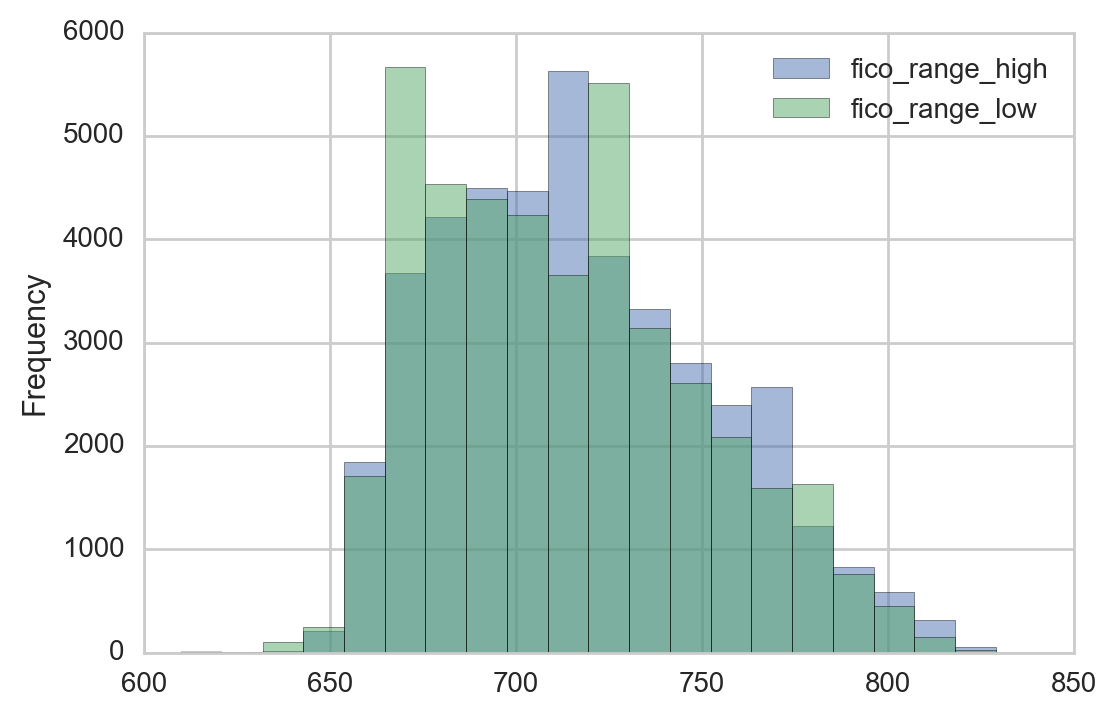

In [29]:
fico_columns = ['fico_range_high','fico_range_low']


loans[fico_columns].plot.hist(alpha=0.5,bins=20);

In [30]:
### take the average of FICO score
loans['fico_average'] = (loans['fico_range_high'] + loans['fico_range_low']) / 2

In [31]:
cols = ['fico_range_low','fico_range_high','fico_average']
loans[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
fico_range_low,42494.0,713.048313,36.183642,610.0,685.0,710.0,740.0,825.0
fico_range_high,42494.0,717.048313,36.183642,614.0,689.0,714.0,744.0,829.0
fico_average,42494.0,715.048313,36.183642,612.0,687.0,712.0,742.0,827.0


In [32]:
drop_col=['fico_range_high','fico_range_low','last_fico_range_low','last_fico_range_high']
loans=loans.drop(drop_col,axis=1)

In [33]:
loans.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,title,addr_state,dti,inq_last_6mths,open_acc,revol_bal,total_acc,fico_average
0,5000.0,36,162.87,2,10,RENT,24000.0,Fully Paid,credit_card,Computer,AZ,27.65,1.0,3.0,13648.0,9.0,737.0
1,2500.0,60,59.83,3,0,RENT,30000.0,Charged Off,car,bike,GA,1.00,5.0,3.0,1687.0,4.0,742.0
2,2400.0,36,84.33,3,10,RENT,12252.0,Fully Paid,small_business,real estate business,IL,8.72,2.0,2.0,2956.0,10.0,737.0
3,10000.0,36,339.31,3,10,RENT,49200.0,Fully Paid,other,personel,CA,20.00,1.0,10.0,5598.0,37.0,692.0
4,3000.0,60,67.79,2,1,RENT,80000.0,Current,other,Personal,OR,17.94,0.0,15.0,27783.0,38.0,697.0


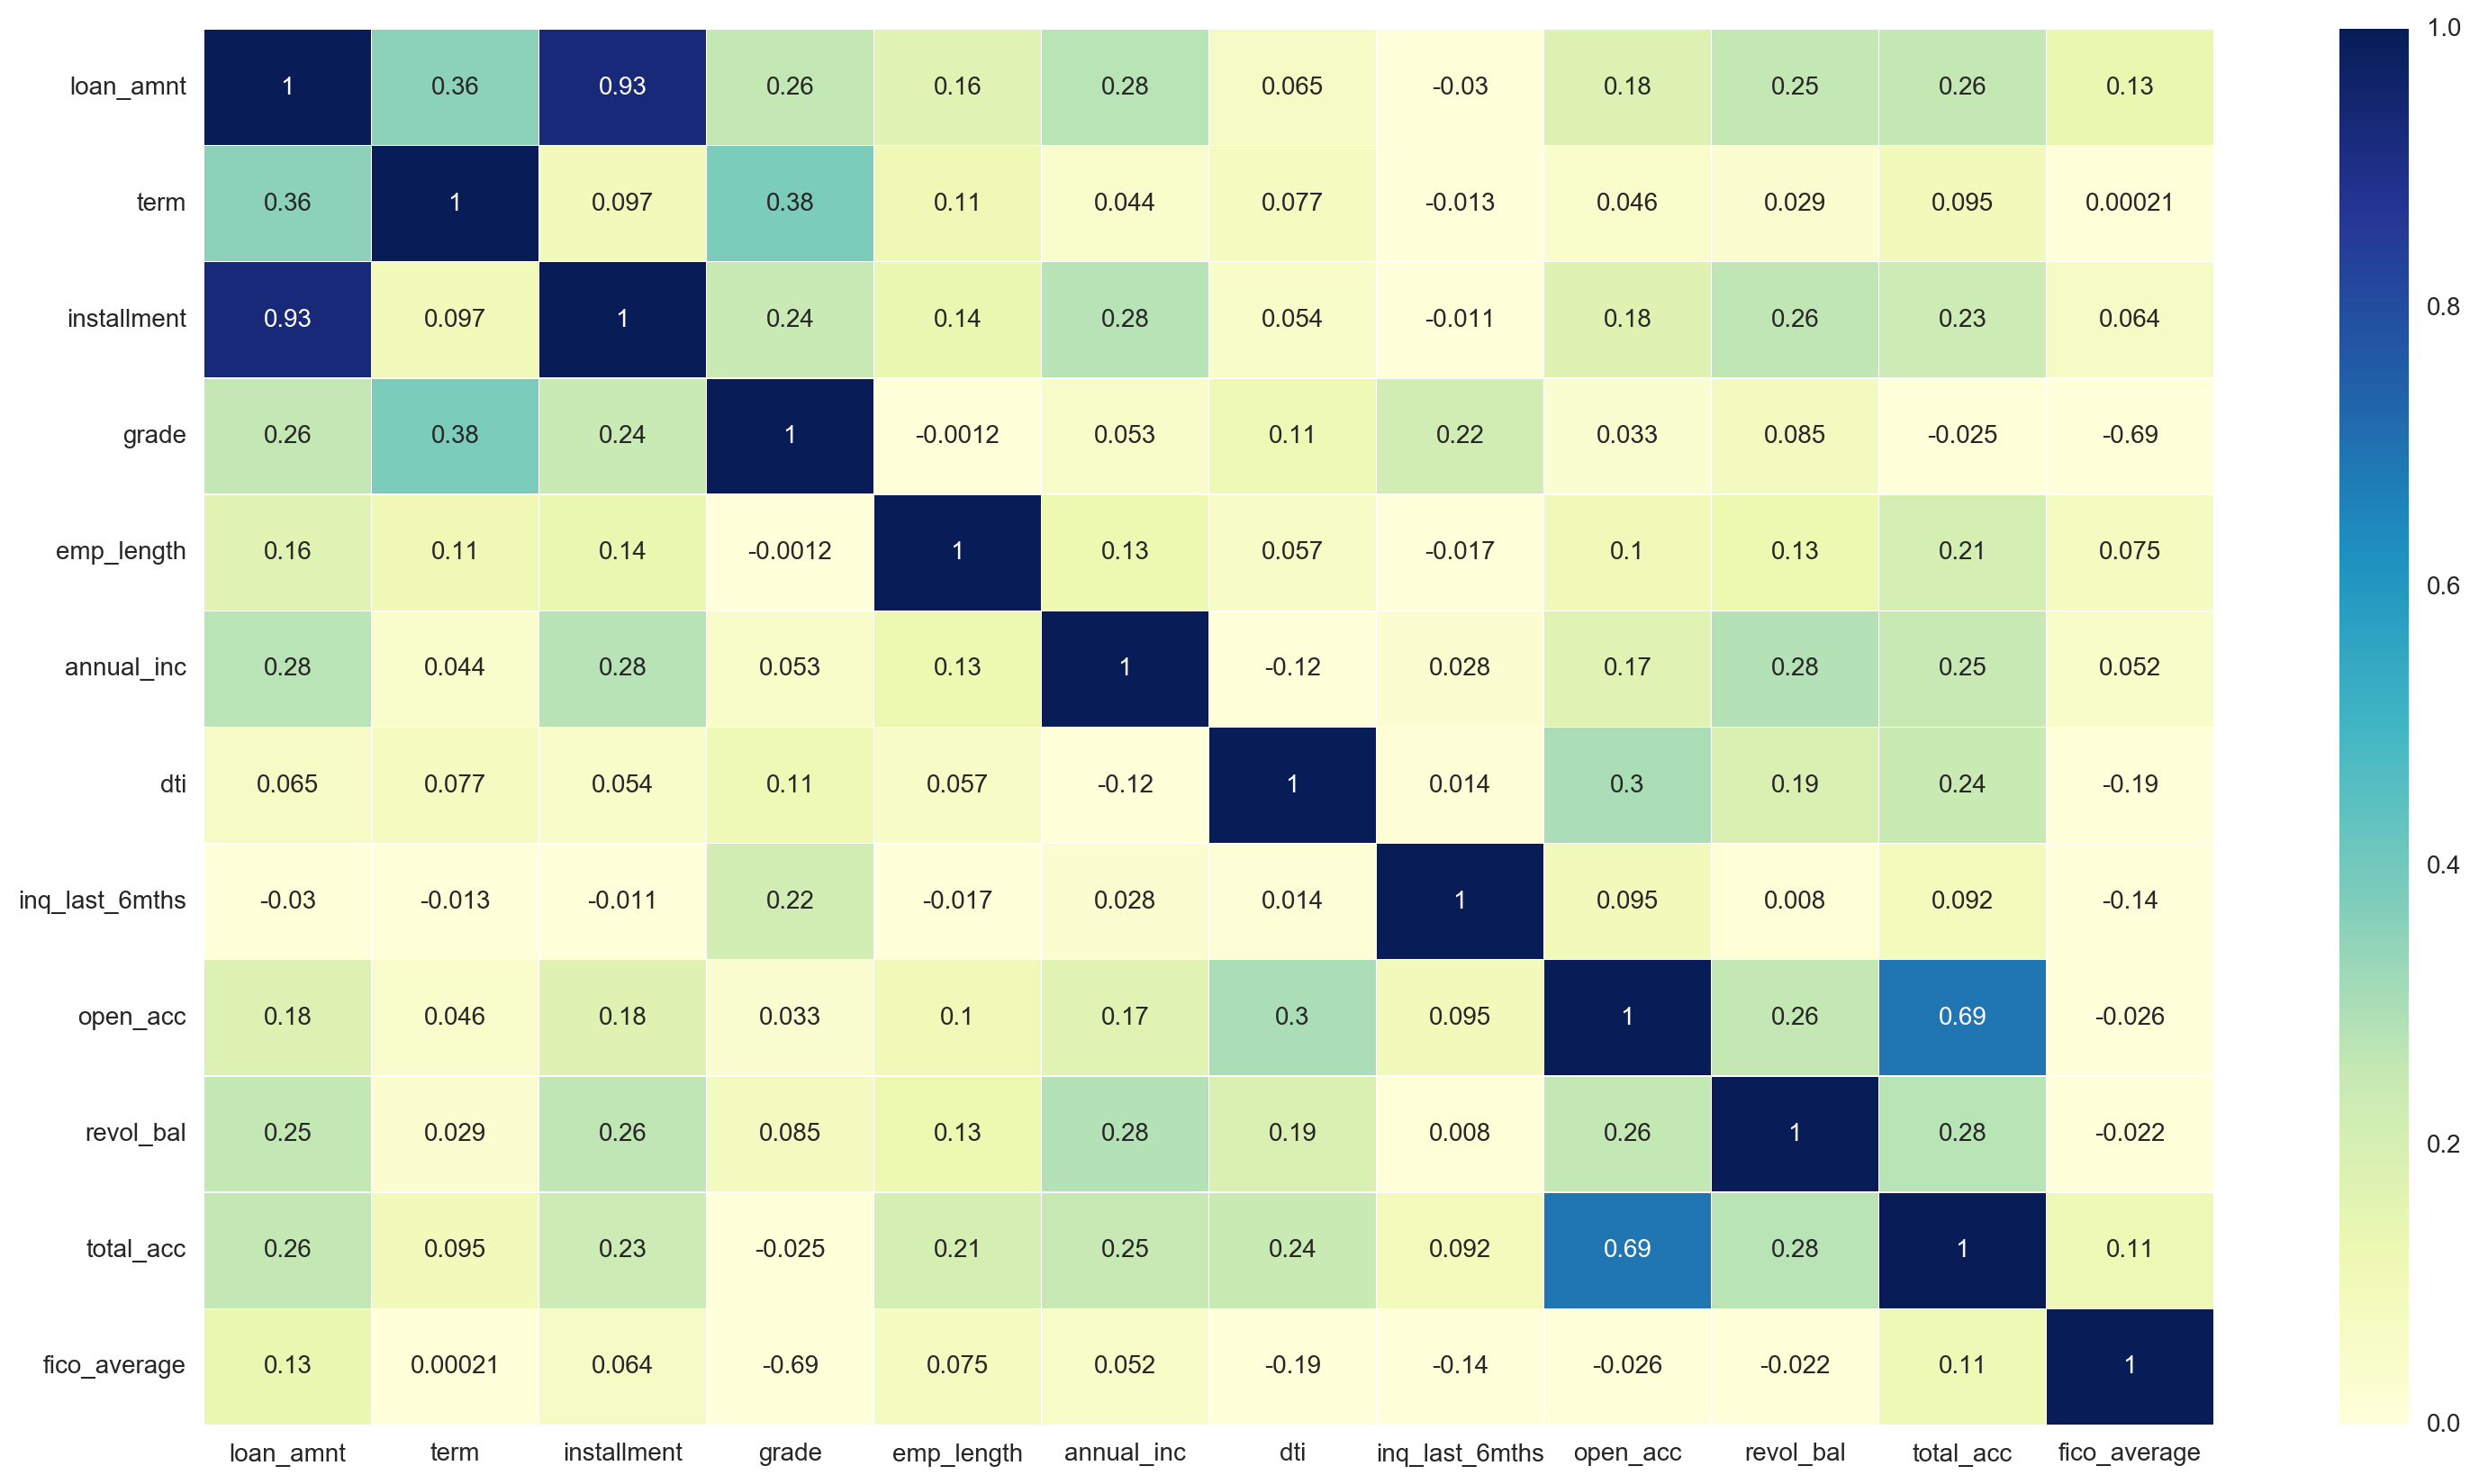

In [34]:
### correlation matrix
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(loans.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

In [35]:
## group by different features
loans.groupby(['purpose'], sort=True)[['loan_amnt']].sum().sort_values(by=['loan_amnt'],ascending=False).reset_index()

,purpose,loan_amnt
0,debt_consolidation,248341150.0
1,credit_card,63583000.0
2,home_improvement,36449750.0
3,other,34997325.0
4,small_business,27195075.0
5,major_purchase,18676125.0
6,car,10917925.0
7,wedding,9791700.0
8,medical,6137150.0
9,house,5360625.0


In [36]:
loans.groupby(['addr_state'], sort=True)[['loan_amnt']].sum().sort_values(by=['loan_amnt'],ascending=False).reset_index()

,addr_state,loan_amnt
0,CA,83824075.0
1,NY,45326750.0
2,TX,33741900.0
3,FL,32878250.0
4,NJ,23079825.0
5,IL,19028675.0
6,PA,17336075.0
7,VA,17069625.0
8,GA,16811500.0
9,MA,16156475.0


In [37]:
loans.groupby(['addr_state'], sort=True)[['fico_average']].mean().sort_values(by=['fico_average'],ascending=False).reset_index()

,addr_state,fico_average
0,WV,720.903743
1,OK,720.401899
2,VT,719.982456
3,SC,719.566462
4,MI,719.368090
5,AL,718.446281
6,NH,718.382979
7,MT,718.197917
8,LA,718.065217
9,NM,718.000000


In [38]:
loans["loan_status"].value_counts()

Fully Paid                                             33578
Charged Off                                             5651
Does not meet the credit policy. Status:Fully Paid      1961
Does not meet the credit policy. Status:Charged Off      757
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [39]:
loans['home_ownership'].value_counts()

RENT        20159
MORTGAGE    18948
OWN          3247
OTHER         136
NONE            4
Name: home_ownership, dtype: int64

In [40]:
loans['title'].value_counts()

Debt Consolidation                               2259
Debt Consolidation Loan                          1760
Personal Loan                                     708
Consolidation                                     547
debt consolidation                                532
Home Improvement                                  373
Credit Card Consolidation                         370
Debt consolidation                                347
Small Business Loan                               333
Personal                                          330
Credit Card Loan                                  323
personal loan                                     266
Consolidation Loan                                264
Home Improvement Loan                             255
personal                                          247
Loan                                              218
Wedding Loan                                      217
consolidation                                     217
Car Loan                    

In [41]:
loans['purpose'].value_counts()

debt_consolidation    19772
credit_card            5475
other                  4394
home_improvement       3199
major_purchase         2311
small_business         1990
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             420
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

In [42]:
loans = loans[(loans["loan_status"] == "Fully Paid") | (loans["loan_status"] == "Charged Off")]

mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
loans= loans.replace(mapping_dictionary)

In [43]:
print loans.loan_status

0        1
1        0
2        1
3        1
5        1
6        1
7        1
8        0
9        0
10       1
11       1
12       0
13       1
14       0
15       1
16       1
17       1
18       1
19       1
20       1
21       0
22       1
23       1
24       0
25       1
26       0
27       0
28       1
29       1
30       1
        ..
39756    1
39757    0
39758    1
39759    1
39760    1
39761    1
39762    1
39763    1
39764    1
39765    1
39766    1
39767    1
39768    1
39769    1
39770    1
39771    1
39772    1
39773    1
39774    1
39775    1
39776    1
39777    1
39778    1
39779    1
39780    1
39781    1
39782    1
39783    1
39784    1
39785    1
Name: loan_status, dtype: int64


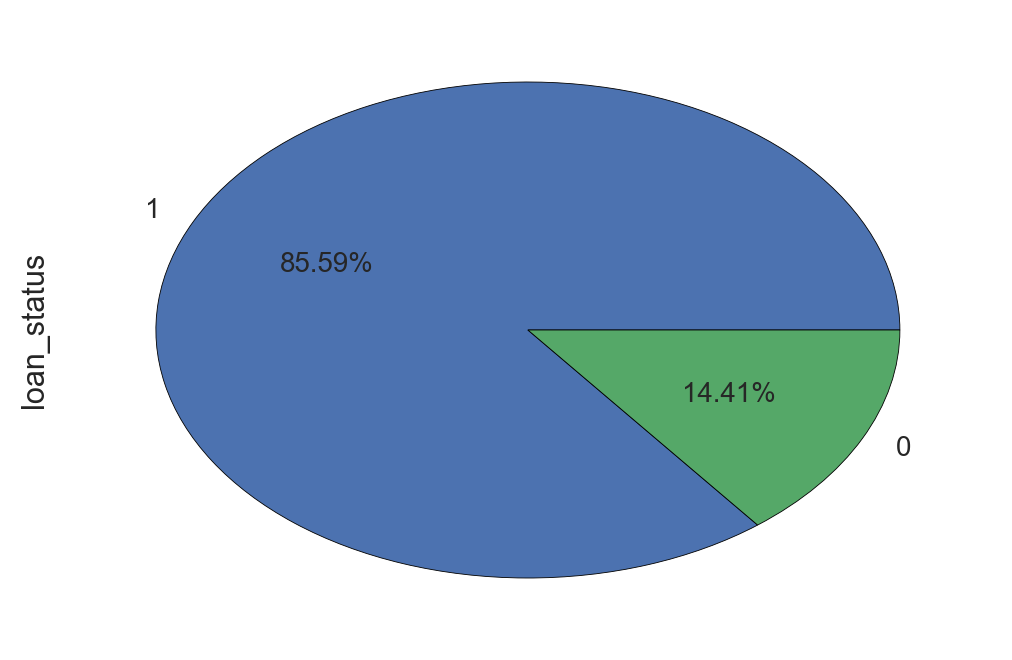

In [44]:
fig= plt.figsize=(10,6)
loans.loan_status.value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

In [45]:
loans.to_csv("/Users/zerindong/Desktop/ECON628-01-zerin5577/projects/cleaned_loans.csv",index=False)

# Part 2. Machine Learning

In [46]:
### loading cleaned dataset
df = pd.read_csv('/Users/zerindong/Desktop/ECON628-01-zerin5577/projects/cleaned_loans.csv') 

In [47]:
df.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,title,addr_state,dti,inq_last_6mths,open_acc,revol_bal,total_acc,fico_average
0,5000.0,36,162.87,2,10,RENT,24000.0,1,credit_card,Computer,AZ,27.65,1.0,3.0,13648.0,9.0,737.0
1,2500.0,60,59.83,3,0,RENT,30000.0,0,car,bike,GA,1.00,5.0,3.0,1687.0,4.0,742.0
2,2400.0,36,84.33,3,10,RENT,12252.0,1,small_business,real estate business,IL,8.72,2.0,2.0,2956.0,10.0,737.0
3,10000.0,36,339.31,3,10,RENT,49200.0,1,other,personel,CA,20.00,1.0,10.0,5598.0,37.0,692.0
4,5000.0,36,156.46,1,3,RENT,36000.0,1,wedding,My wedding loan I promise to pay back,AZ,11.20,3.0,9.0,7963.0,12.0,732.0


In [48]:
df2=df[['loan_amnt','installment','grade','emp_length','annual_inc','loan_status','dti','open_acc','revol_bal','total_acc','fico_average']]

In [49]:
df2.head()

,loan_amnt,installment,grade,emp_length,annual_inc,loan_status,dti,open_acc,revol_bal,total_acc,fico_average
0,5000.0,162.87,2,10,24000.0,1,27.65,3.0,13648.0,9.0,737.0
1,2500.0,59.83,3,0,30000.0,0,1.00,3.0,1687.0,4.0,742.0
2,2400.0,84.33,3,10,12252.0,1,8.72,2.0,2956.0,10.0,737.0
3,10000.0,339.31,3,10,49200.0,1,20.00,10.0,5598.0,37.0,692.0
4,5000.0,156.46,1,3,36000.0,1,11.20,9.0,7963.0,12.0,732.0


In [50]:
columns_ = df2.columns.tolist()
exclude_cols = ['loan_status']

y = df2.loan_status.values

X = df2[[i for i in columns_ if i not in exclude_cols]]
print y.shape, X.shape

(39229,) (39229, 10)


In [51]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(27460, 10) (27460,)
(11769, 10) (11769,)


In [52]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {  "penalty": ['l1','l2'], "C": Cs, "fit_intercept": [False, True], 
                       "class_weight": [None, "balanced"], "intercept_scaling": [2, 1], "solver":  ['liblinear']
                    }


from sklearn.grid_search import GridSearchCV

estimator = GridSearchCV(logistic, search_parameters, cv=5, verbose=1, n_jobs=-1)

In [53]:
estimator.fit(X_train,y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed: 14.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63665e+03,   4.83293e+03,   8.85867e+03,
         1.62378e+04,   2.97635e+04,   5.45559e+04,   1.00000e+05]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [54]:
log_best = estimator.best_estimator_
print "Best estimators on the left out data:\n", log_best

print "\nBest C / Regularization Param on the left out data:\n", estimator.best_estimator_.C 
# This estimator.best_estimator_ object has many great reporting metrics
## Estimator that was chosen by the search, i.e. 
## estimator which gave highest score (or smallest loss if specified) on the left out data. 
## Not available if refit=False.

print "\nBest Params on hold out data (train):\n", estimator.best_params_
##Parameter setting that gave the best results on the hold out data.

print "\nBest Score on left out data:%.3f \n" % estimator.best_score_
## Score of best_estimator on the left out data.

Best estimators on the left out data:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=2, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Best C / Regularization Param on the left out data:
1.0

Best Params on hold out data (train):
{'C': 1.0, 'intercept_scaling': 2, 'fit_intercept': False, 'solver': 'liblinear', 'penalty': 'l2', 'class_weight': None}

Best Score on left out data:0.856 



In [55]:
from sklearn.metrics import confusion_matrix
y_pred=estimator.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 ', 'True_Label_1'],
                         columns=['Predict_Label_0', 'Predict_Label_1'])

confusion

,Predict_Label_0,Predict_Label_1
True_Label_0,0,1690
True_Label_1,0,10079


In [56]:
from sklearn.metrics import classification_report

cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1690
          1       0.86      1.00      0.92     10079

avg / total       0.73      0.86      0.79     11769



/Applications/Utilities/anaconda/envs/econ/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


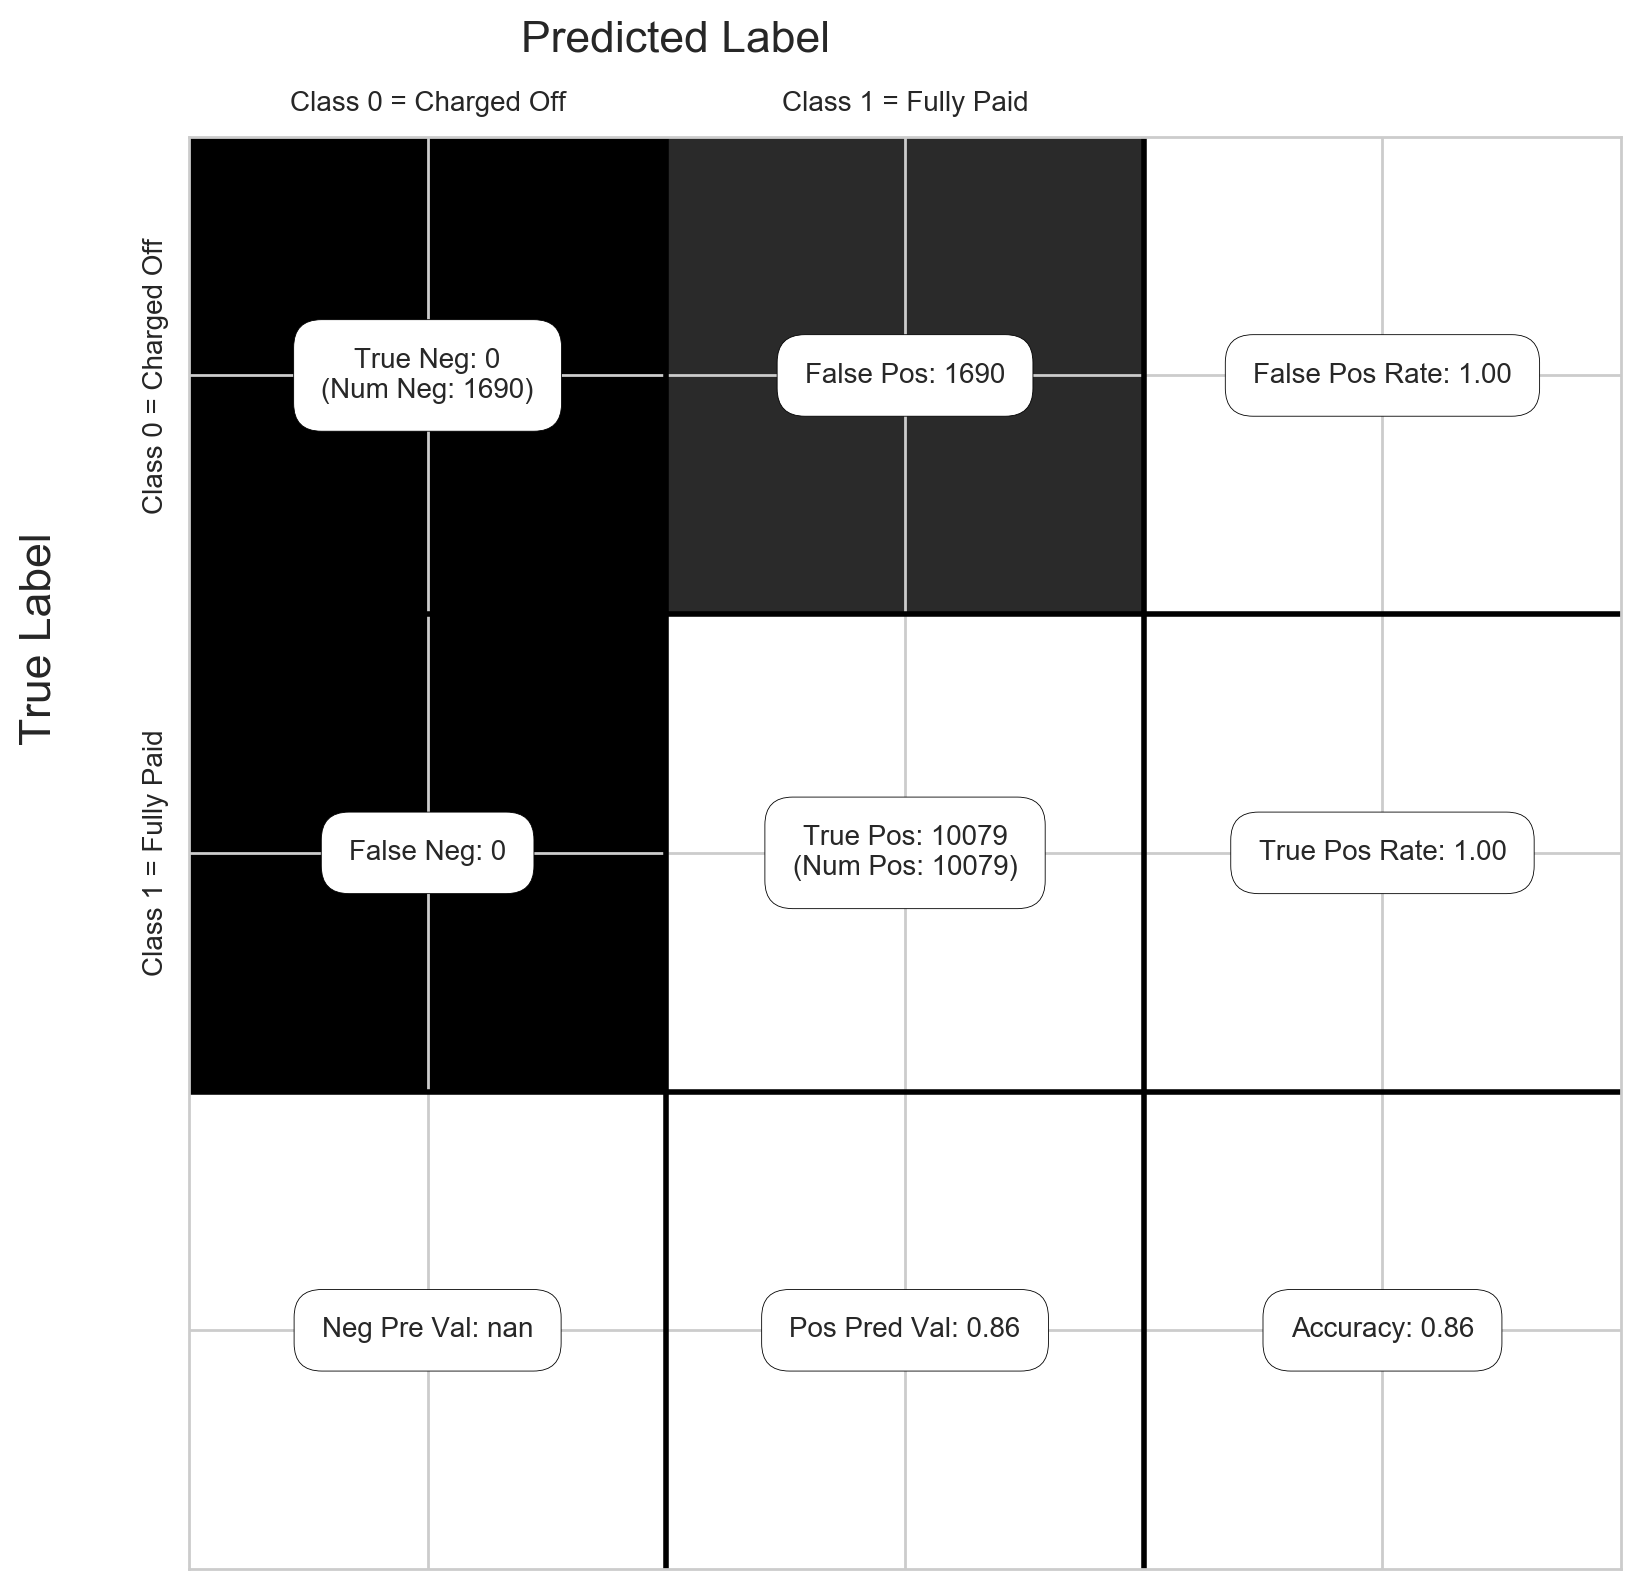

In [57]:
import imp
confusion = imp.load_source('confussion', '../utils/stats/confussion.py')

from confussion import show_confusion_matrix

C = confusion_matrix(y_test, estimator.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Charged Off', 'Class 1 = Fully Paid'])

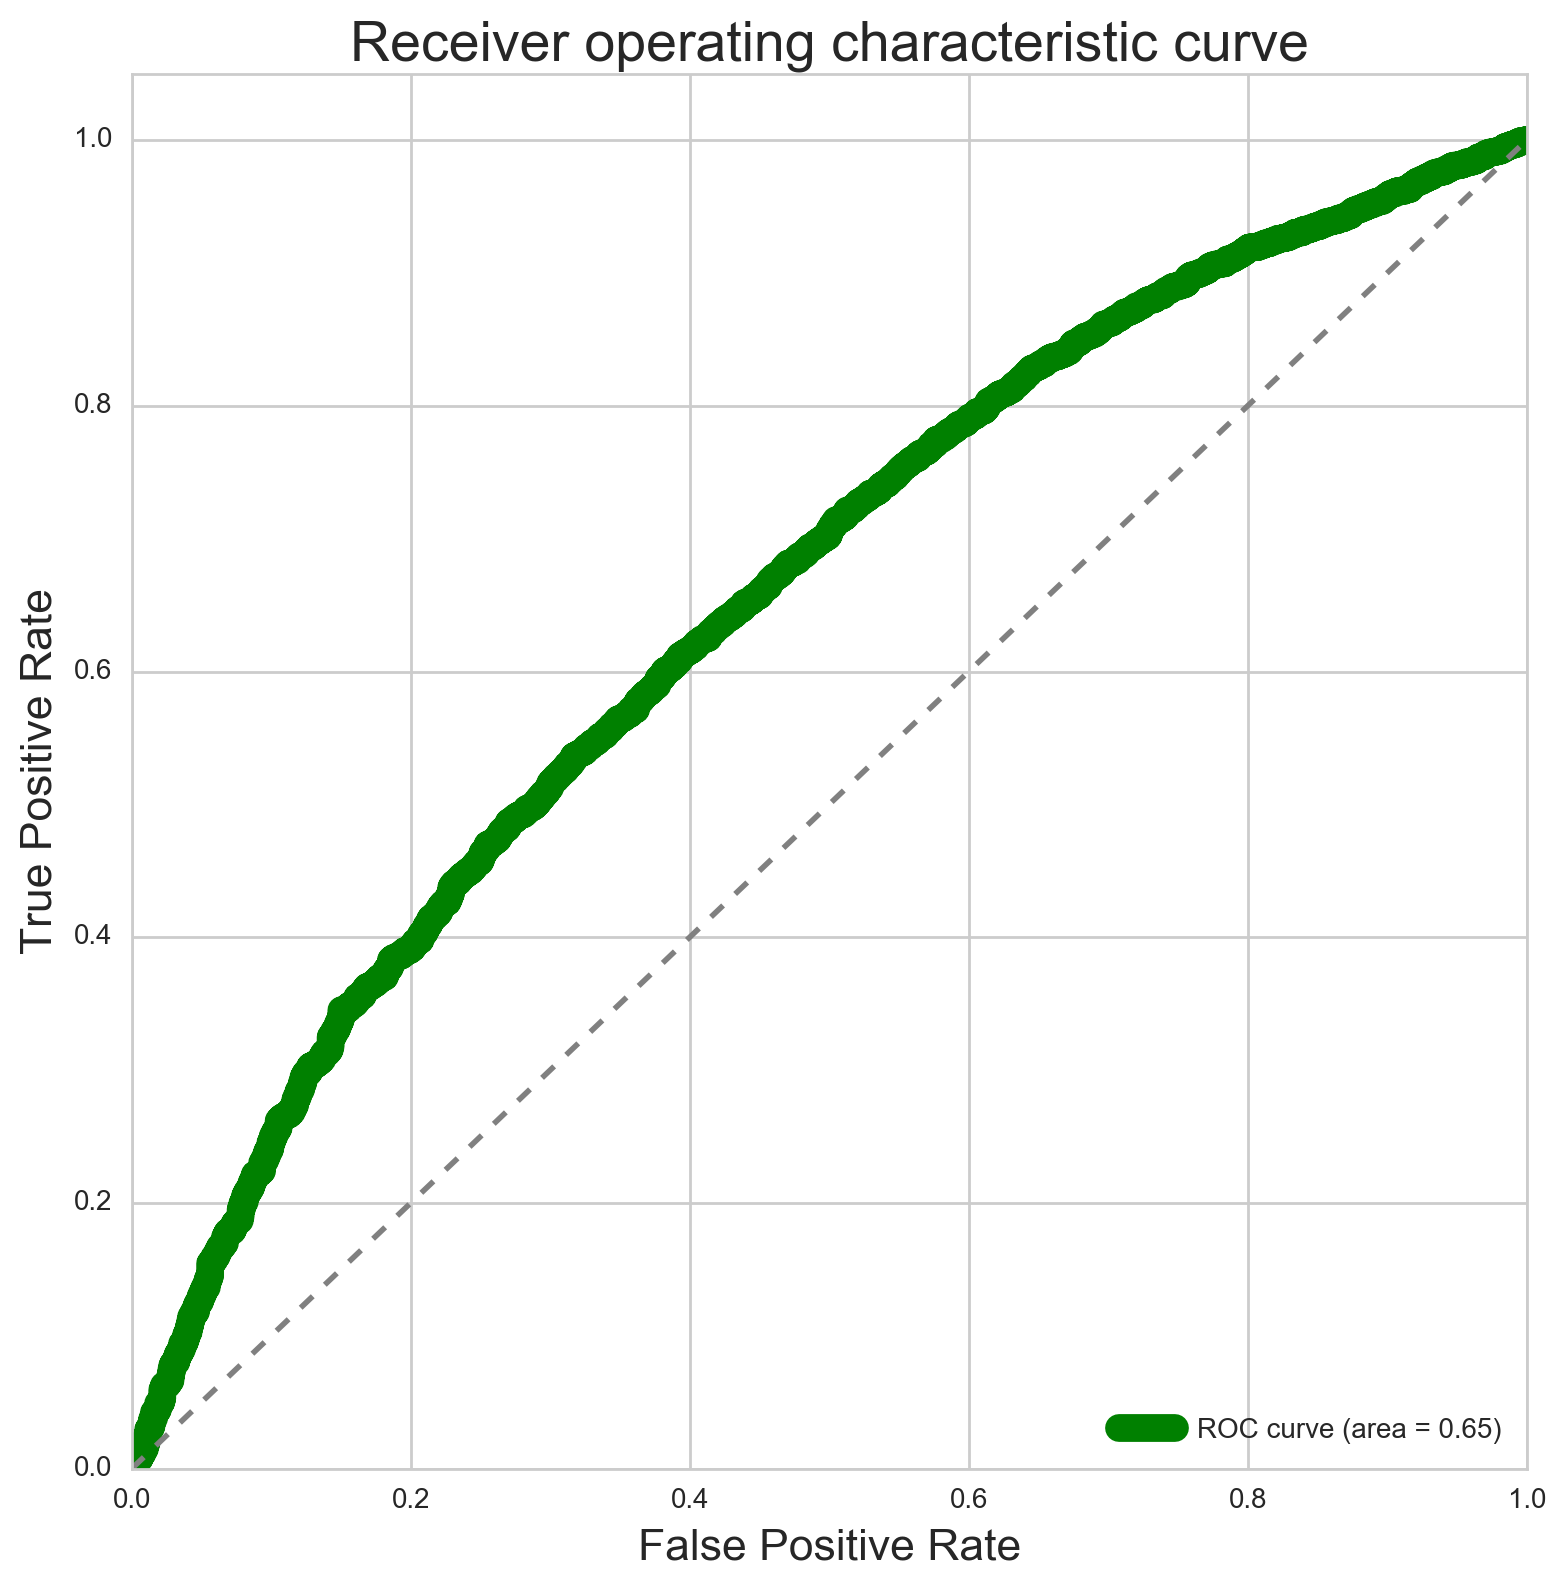

In [58]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = estimator.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [59]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7]
         }
    
gsdt = GridSearchCV(dec_tree, params, n_jobs=-1, cv=5, verbose=1)

In [60]:
gsdt.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   22.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [61]:
dct_best = gsdt.best_estimator_
print "Best estimators on the left out data:\n", dct_best
print ''

print "\nBest Params on hold out data (train):\n", gsdt.best_params_
##Parameter setting that gave the best results on the hold out data.
print ''

print "\nBest Score on left out data:%.3f \n" % gsdt.best_score_
## Score of best_estimator on the left out data.
print ''

Best estimators on the left out data:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=7,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


Best Params on hold out data (train):
{'max_features': 'auto', 'min_samples_split': 5, 'max_depth': 3, 'min_samples_leaf': 7}


Best Score on left out data:0.856 




In [62]:
y_pred= gsdt.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 Charged Off', 'True_Label_1 Fully Paid'],
                         columns=['Predict_Label_0 Charged Off', 'Predict_Label_1 Fully Paid'])

confusion

,Predict_Label_0 Charged Off,Predict_Label_1 Fully Paid
True_Label_0 Charged Off,0,1690
True_Label_1 Fully Paid,0,10079


In [63]:
cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1690
          1       0.86      1.00      0.92     10079

avg / total       0.73      0.86      0.79     11769



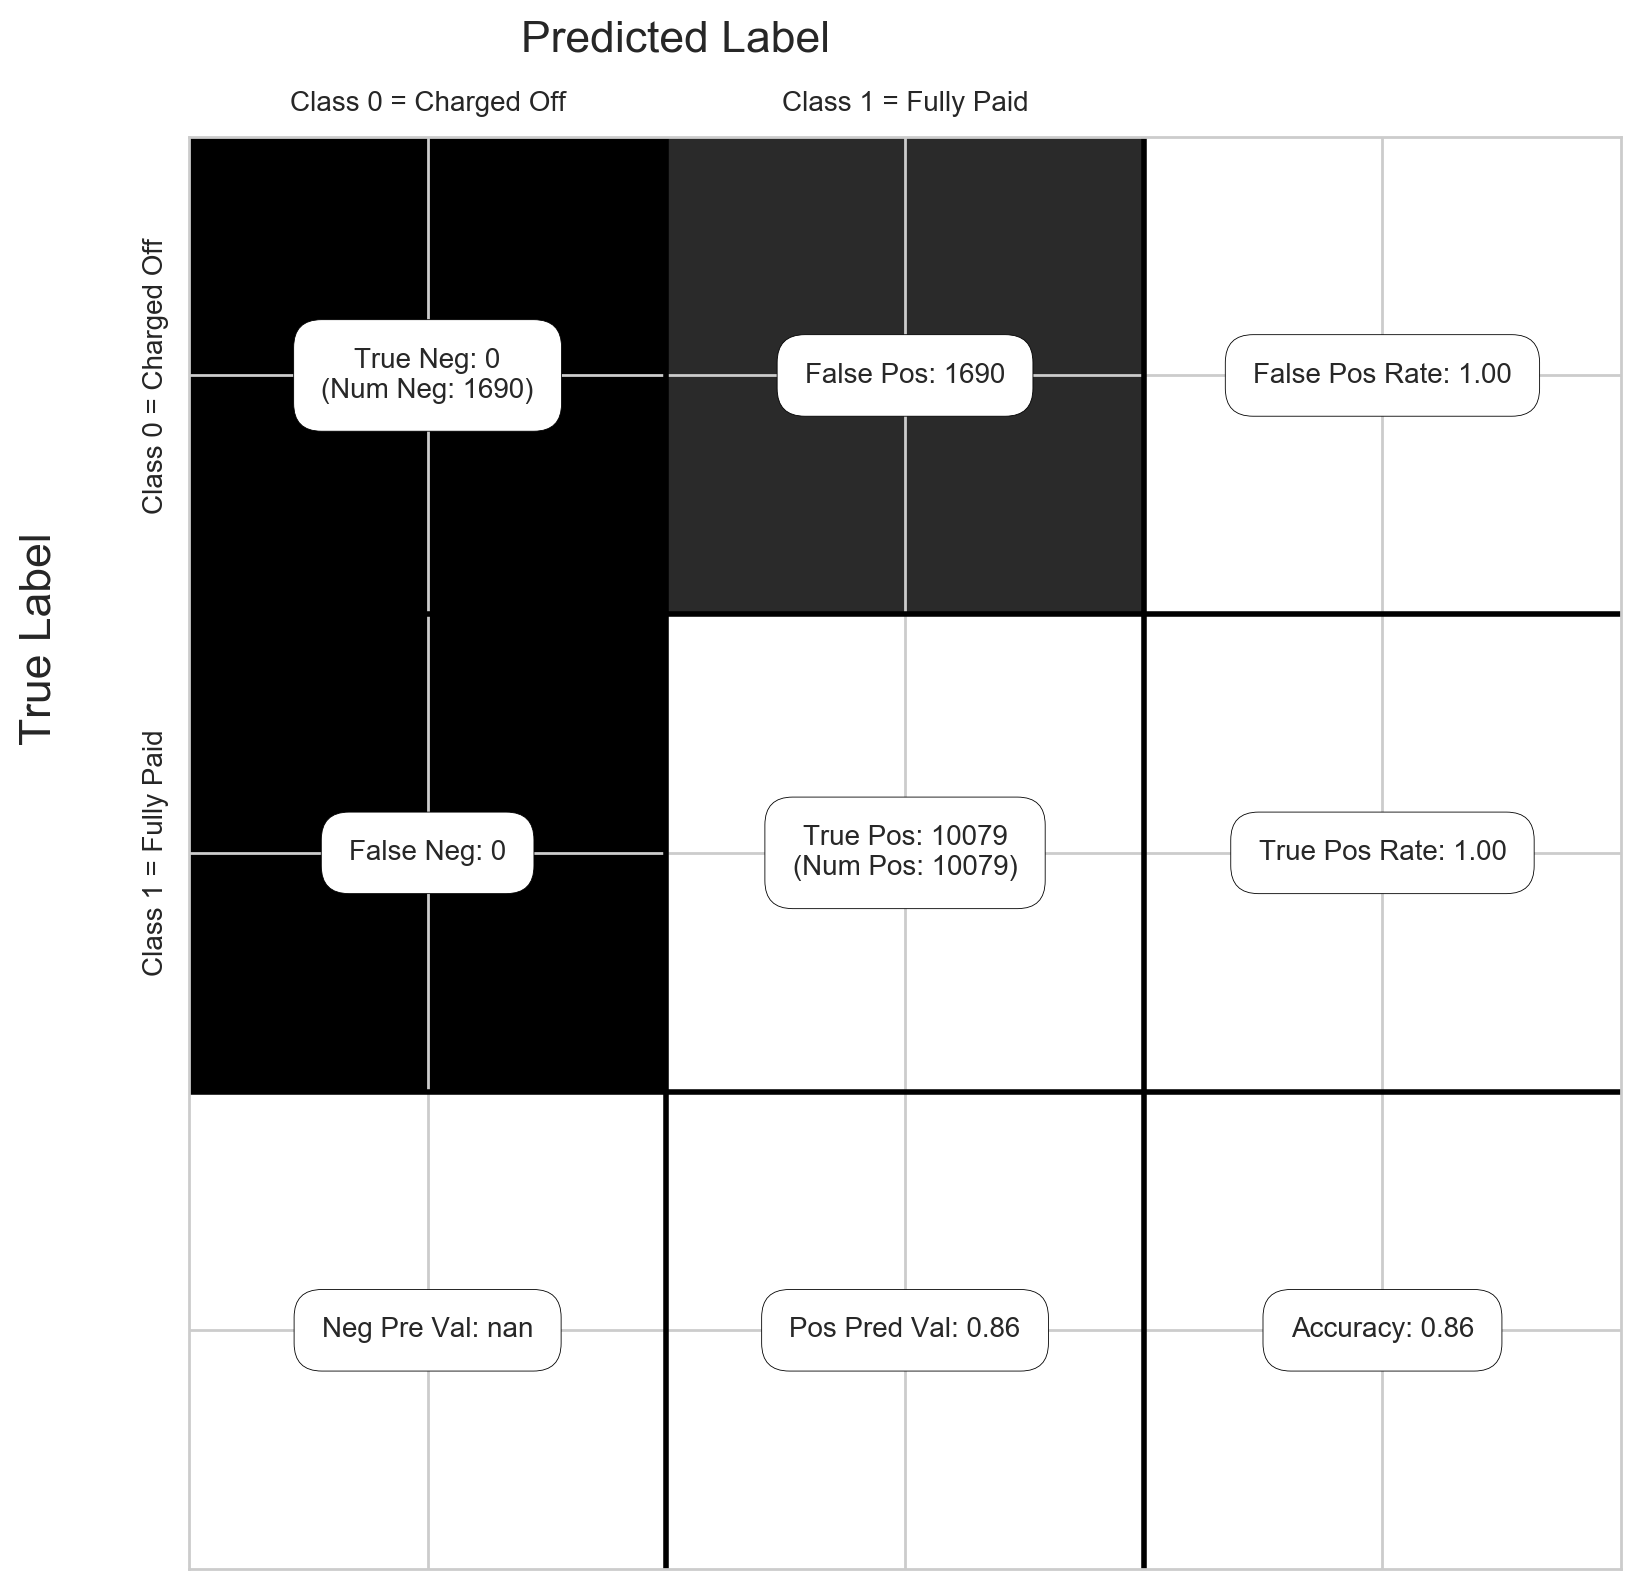

In [64]:
C = confusion_matrix(y_test, gsdt.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Charged Off', 'Class 1 = Fully Paid'])

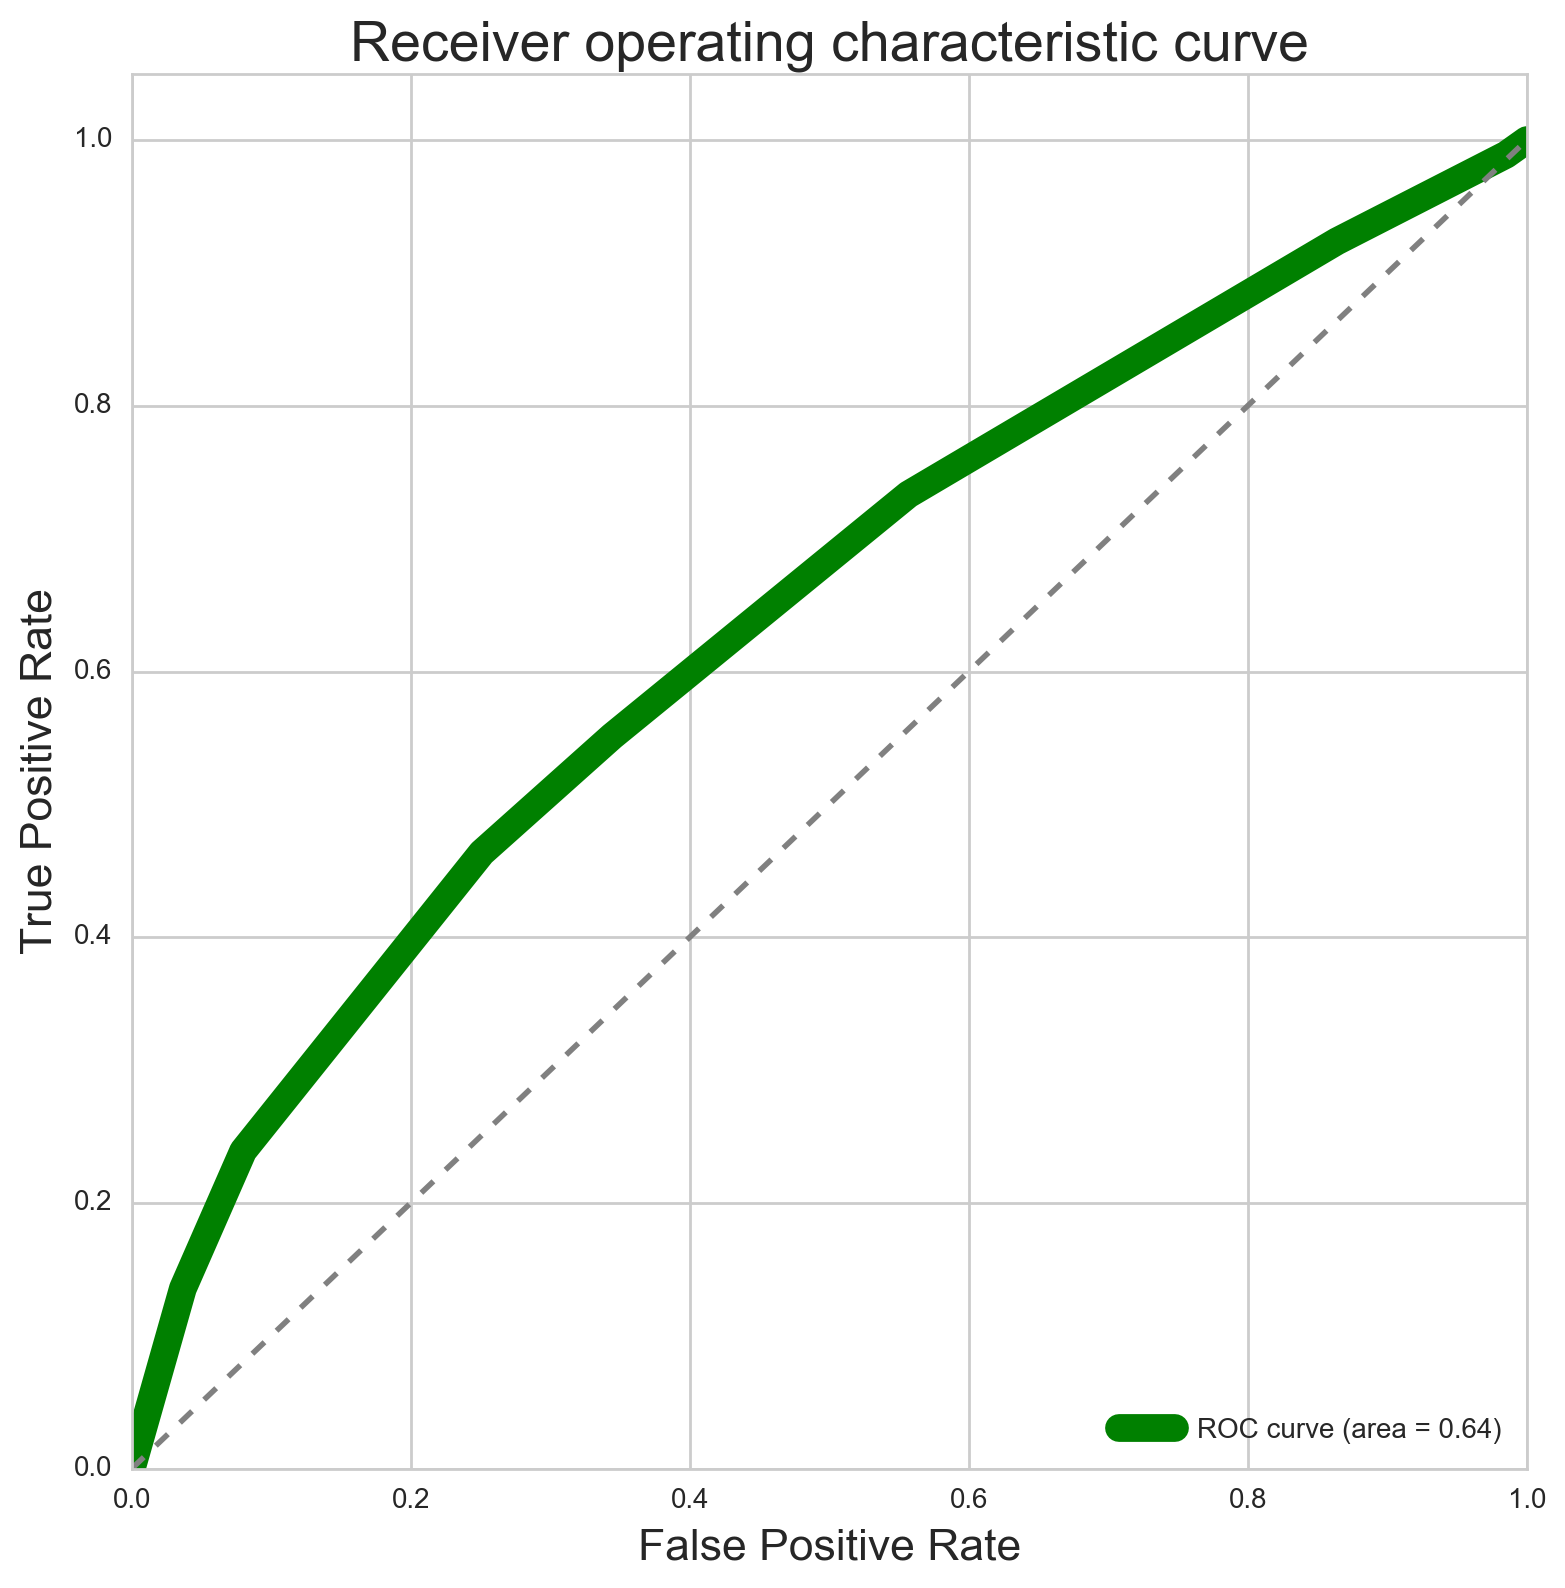

In [65]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = gsdt.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [66]:
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

In [67]:
feature_importance(X, dct_best)

,feature,importance
2,grade,0.633525
9,fico_average,0.229602
5,dti,0.072025
4,annual_inc,0.064848
0,loan_amnt,0.000000
1,installment,0.000000
3,emp_length,0.000000
6,open_acc,0.000000
7,revol_bal,0.000000
8,total_acc,0.000000


In [68]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

Couldn't import dot_parser, loading of dot files will not be possible.


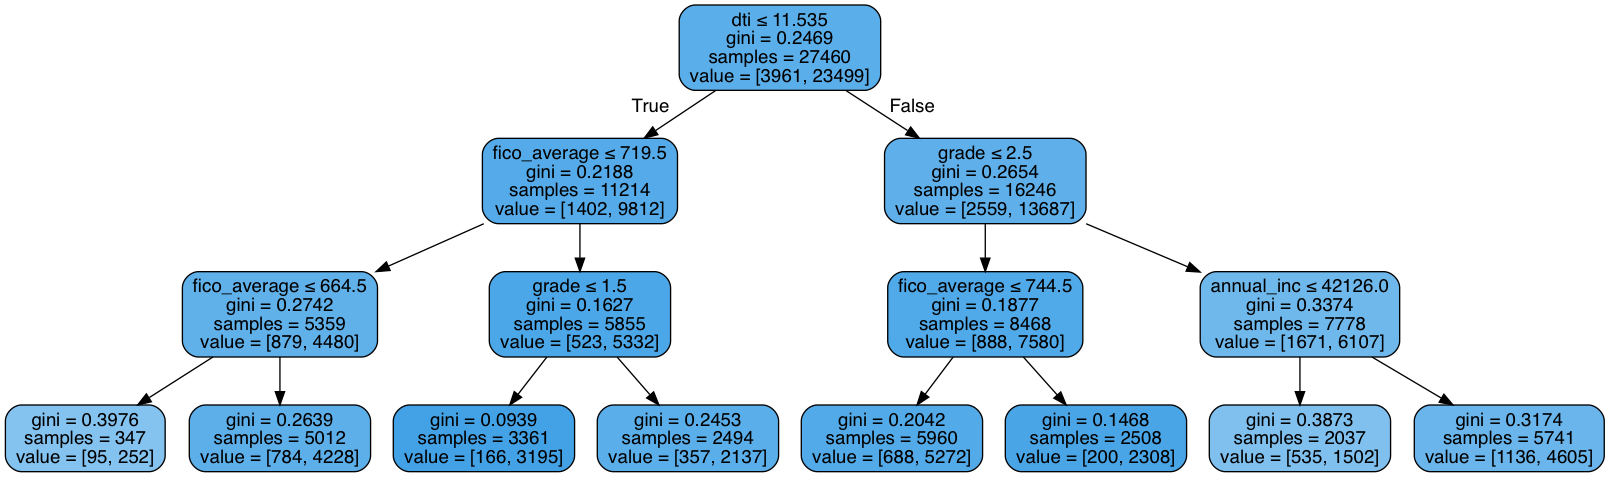

In [69]:
dot_data = StringIO()
''' dtr_best was defined before in section B'''

## Graph
export_graphviz(dct_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
## Define a Random Forest Classifier
rfc = RandomForestClassifier()

rf_params = {
    'max_features':[None,'log2','sqrt', 2,3,4,5],
    'max_depth':[1,2,3,None],
#     'min_samples_leaf':np.linspace(0, 101, 20),
    'n_estimators':[100]
}

## gridsearch parameters, and cv =5
rf_gs = GridSearchCV(rfc, rf_params, cv=5, verbose=1, n_jobs=-1)

In [72]:
rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  2.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'n_estimators': [100], 'max_depth': [1, 2, 3, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [73]:
rfc_best = rf_gs.best_estimator_
print "Best estimators on the left out data:\n", rfc_best
print ''

print "\nBest Params on hold out data (train):\n", rf_gs.best_params_
##Parameter setting that gave the best results on the hold out data.
print ''

print "\nBest Score on left out data:%.3f \n" % rf_gs.best_score_
## Score of best_estimator on the left out data.
print ''

Best estimators on the left out data:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Best Params on hold out data (train):
{'max_features': None, 'n_estimators': 100, 'max_depth': 1}


Best Score on left out data:0.856 




In [74]:
cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1690
          1       0.86      1.00      0.92     10079

avg / total       0.73      0.86      0.79     11769



In [75]:
y_pred= rfc_best.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 Charged Off', 'True_Label_1 Fully Paid'],
                         columns=['Predict_Label_0 Charge Off', 'Predict_Label_1 Fully Paid'])

confusion

,Predict_Label_0 Charge Off,Predict_Label_1 Fully Paid
True_Label_0 Charged Off,0,1690
True_Label_1 Fully Paid,0,10079


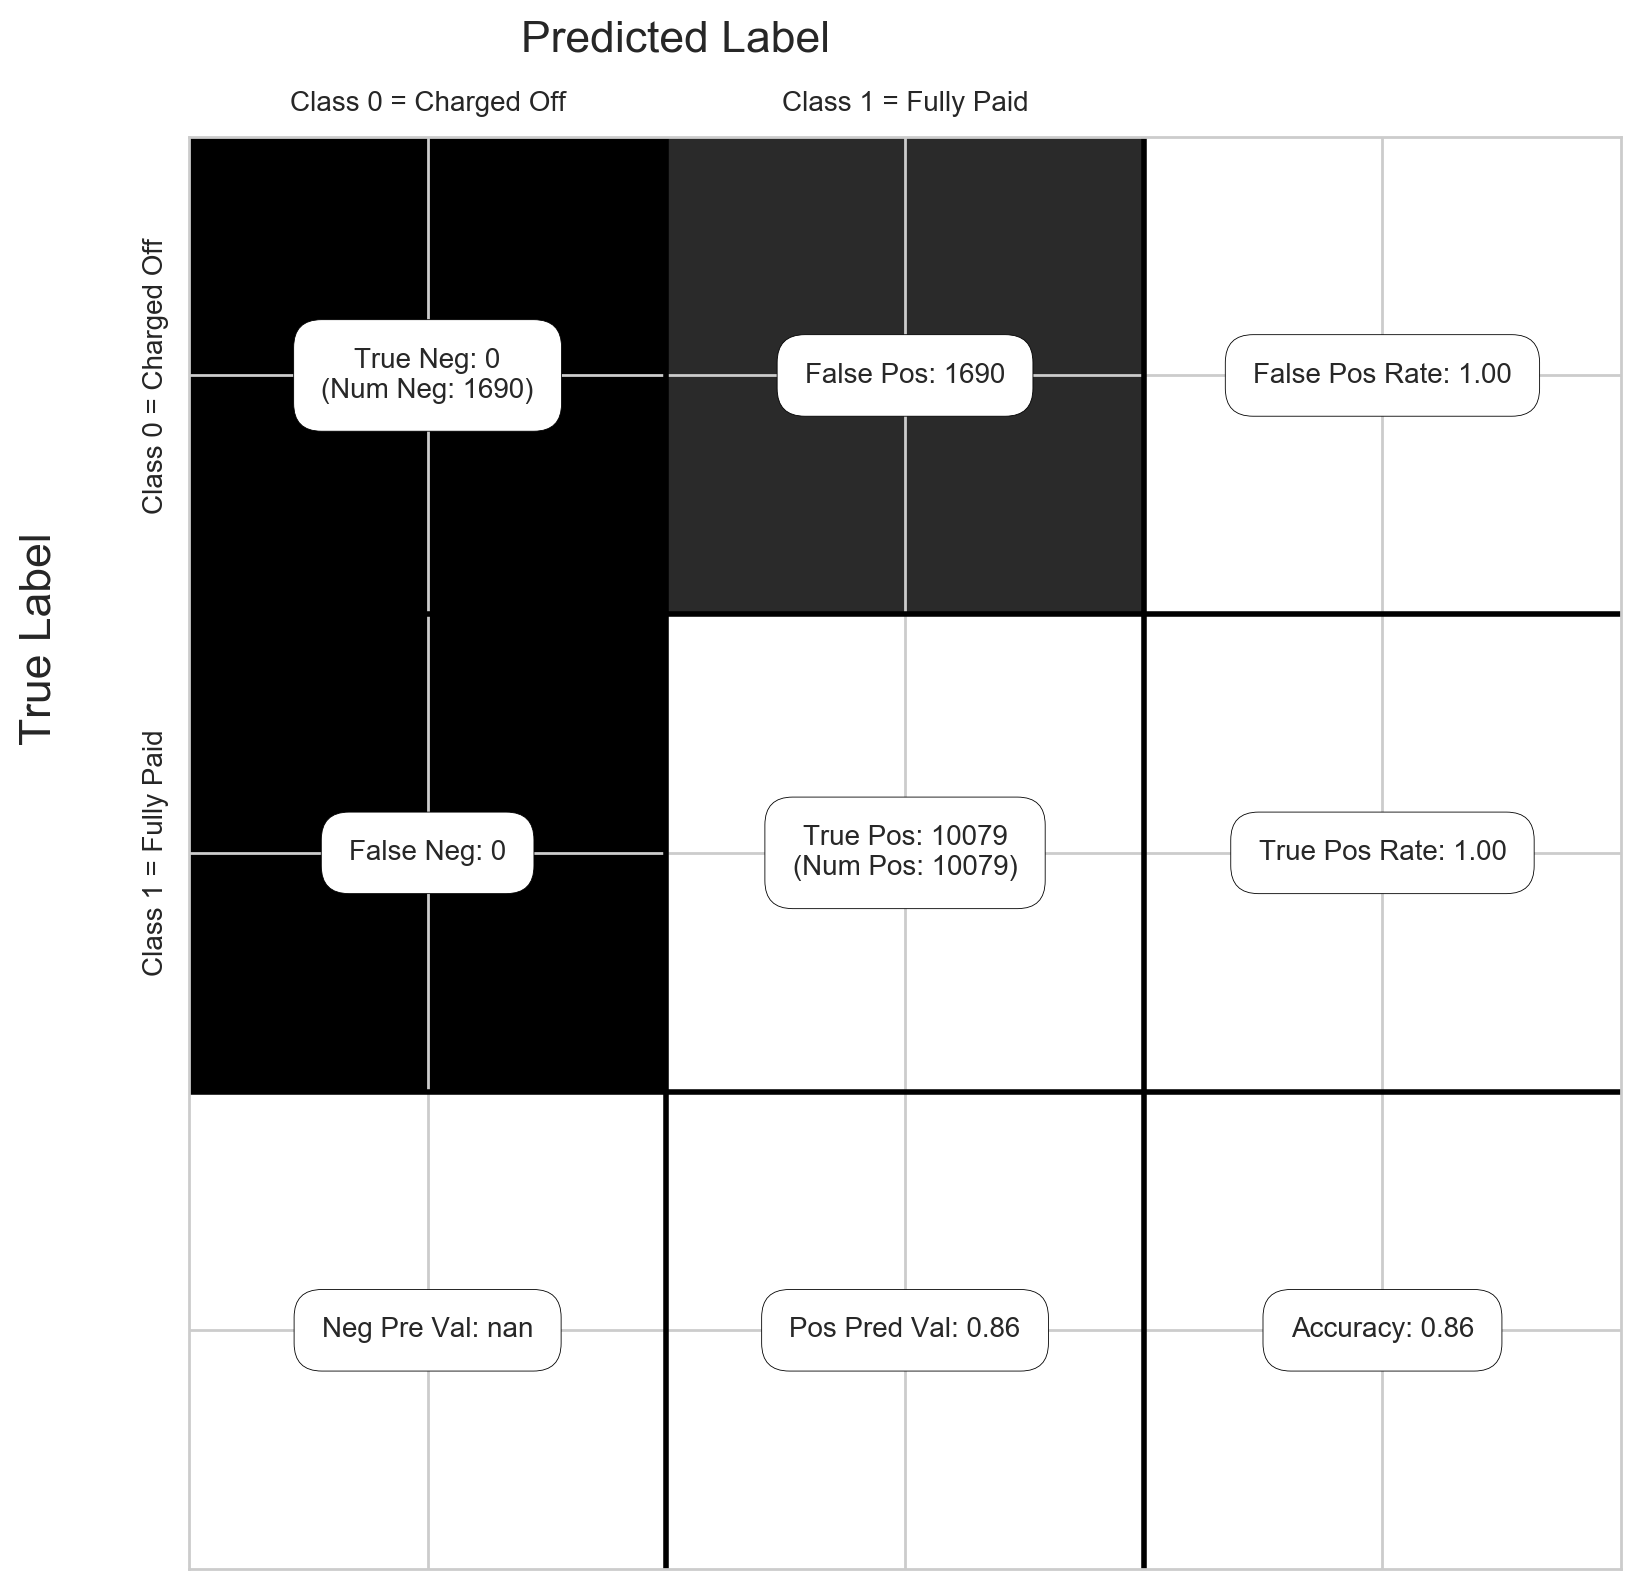

In [76]:
C = confusion_matrix(y_test, rf_gs.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Charged Off', 'Class 1 = Fully Paid'])

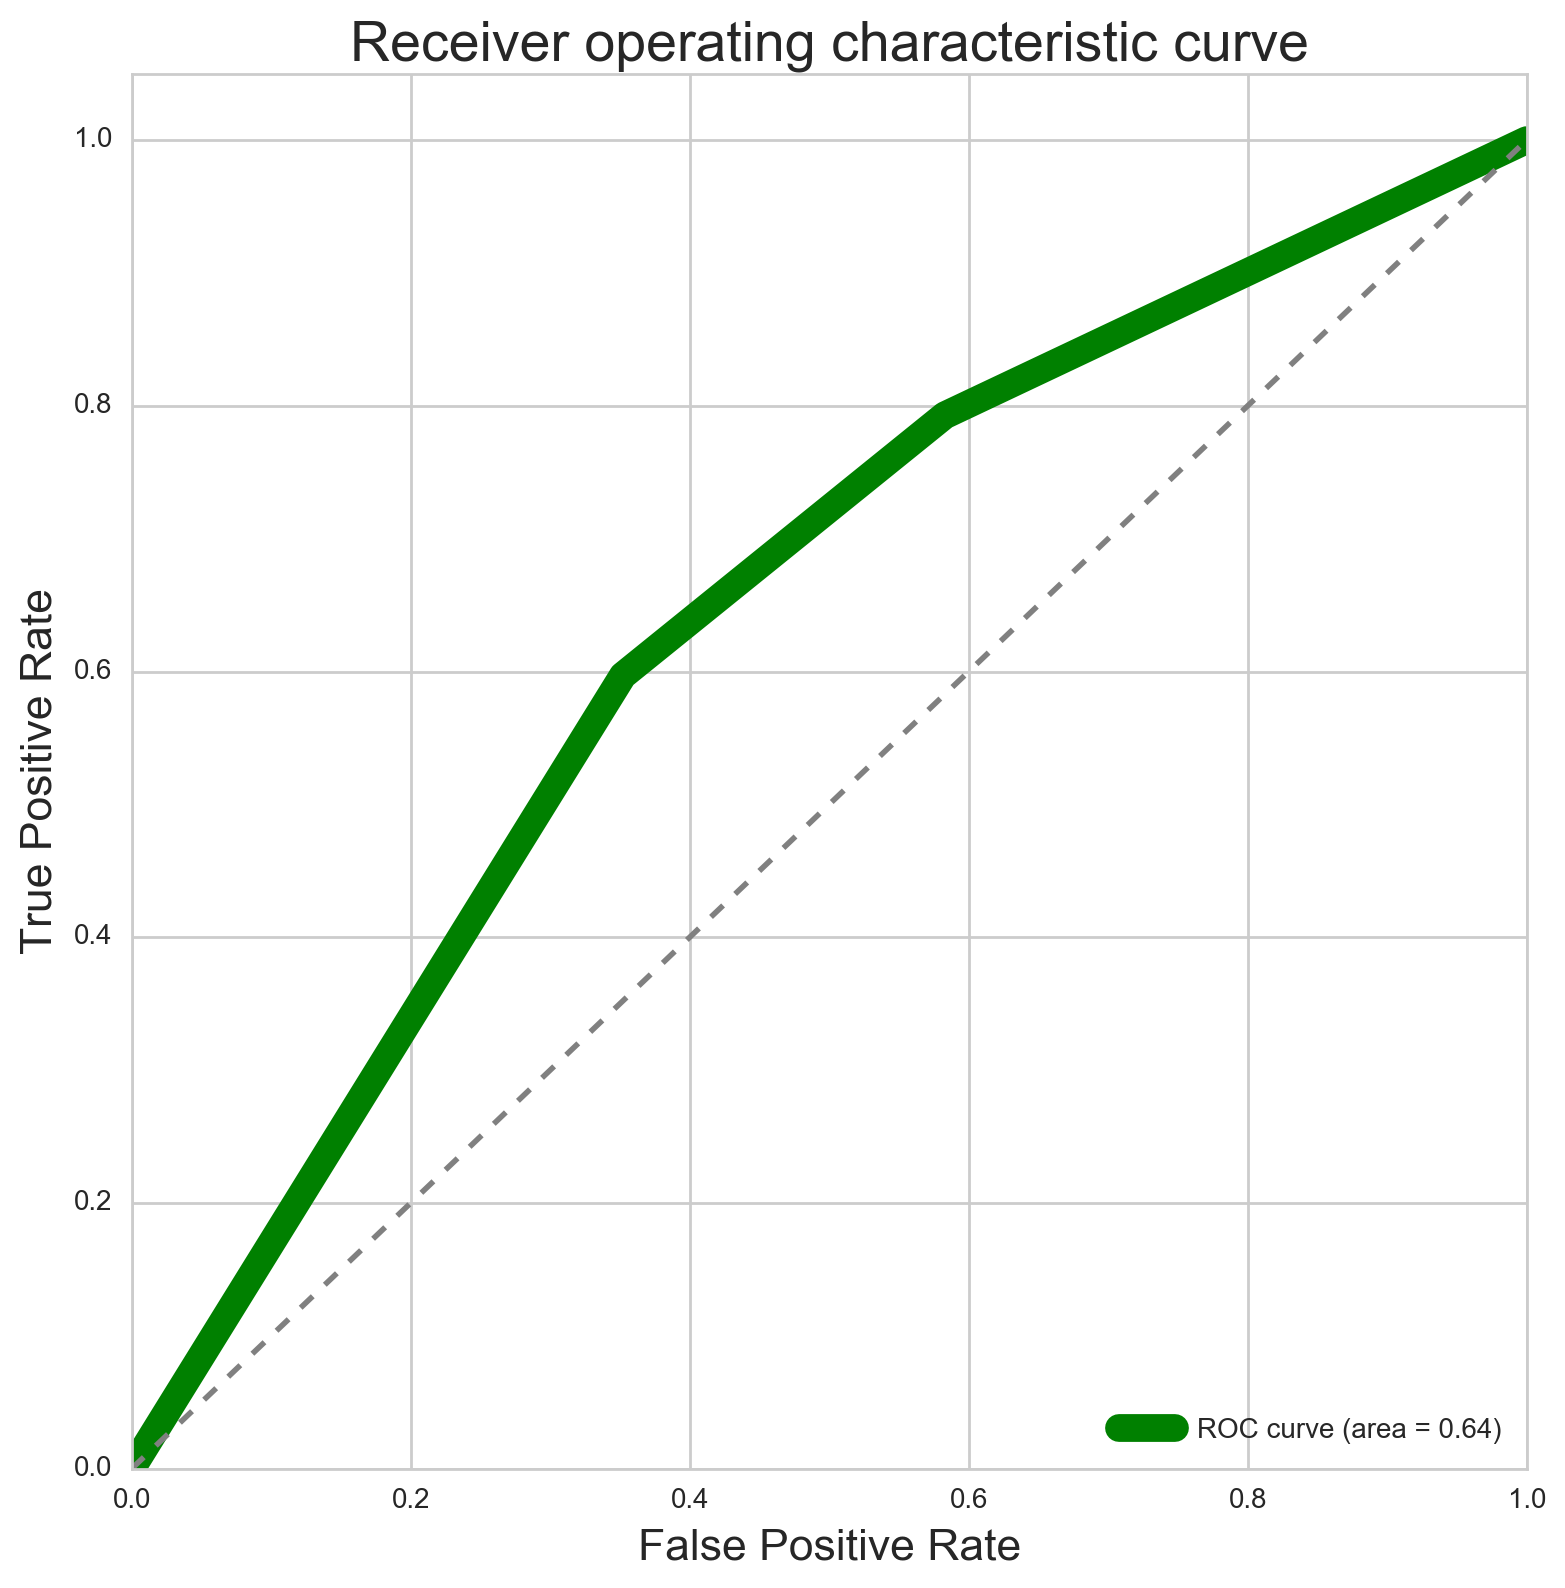

In [77]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = rf_gs.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [78]:
feature_importance(X, rfc_best)

,feature,importance
2,grade,1.0
0,loan_amnt,0.0
1,installment,0.0
3,emp_length,0.0
4,annual_inc,0.0
5,dti,0.0
6,open_acc,0.0
7,revol_bal,0.0
8,total_acc,0.0
9,fico_average,0.0


In [79]:
from sklearn.ensemble import BaggingClassifier

In [80]:
bdt = BaggingClassifier(DecisionTreeClassifier())
params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
         }
    

gsbdt = GridSearchCV(bdt, params, cv=5, verbose=1, n_jobs=-1)

In [81]:
gsbdt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 11242 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 12792 tasks      | elapsed: 22

GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, ...n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [2, 5, 10, 20], 'max_samples': [0.5, 0.7, 1.0], 'base_estimator__min_samples_split': [2, 5, 7], 'base_estimator__max_depth': [3, 5, 10, 20], 'bootstrap_features': [False, True], 'max_features': [0.5, 0.7, 1.0], 'base_estimator__min_samples_leaf': [1, 3, 5, 7, 10], 'base_estimator__max_features': [None, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [82]:
bagc_best = gsbdt.best_estimator_
print "Best estimators on the left out data:\n", bagc_best
print ''

print "\nBest Params on hold out data (train):\n", gsbdt.best_params_
##Parameter setting that gave the best results on the hold out data.
print ''

print "\nBest Score on left out data:%.3f \n" % gsbdt.best_score_
## Score of best_estimator on the left out data.
print ''

Best estimators on the left out data:
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=True, max_features=0.5,
         max_samples=1.0, n_estimators=2, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)


Best Params on hold out data (train):
{'max_samples': 1.0, 'base_estimator__min_samples_split': 2, 'base_estimator__max_depth': 5, 'base_estimator__max_features': 'auto', 'n_estimators': 2, 'max_features': 0.5, 'base_estimator__min_samples_leaf': 3, 'bootstrap_features': True}


Best Score on left out data:0.856 




In [83]:
y_pred= bagc_best.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 Charged Off', 'True_Label_1 Fully Paid'],
                         columns=['Predict_Label_0 Charged Off', 'Predict_Label_1 Fully Paid'])

confusion

,Predict_Label_0 Charged Off,Predict_Label_1 Fully Paid
True_Label_0 Charged Off,1,1689
True_Label_1 Fully Paid,10,10069


In [84]:
cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.09      0.00      0.00      1690
          1       0.86      1.00      0.92     10079

avg / total       0.75      0.86      0.79     11769



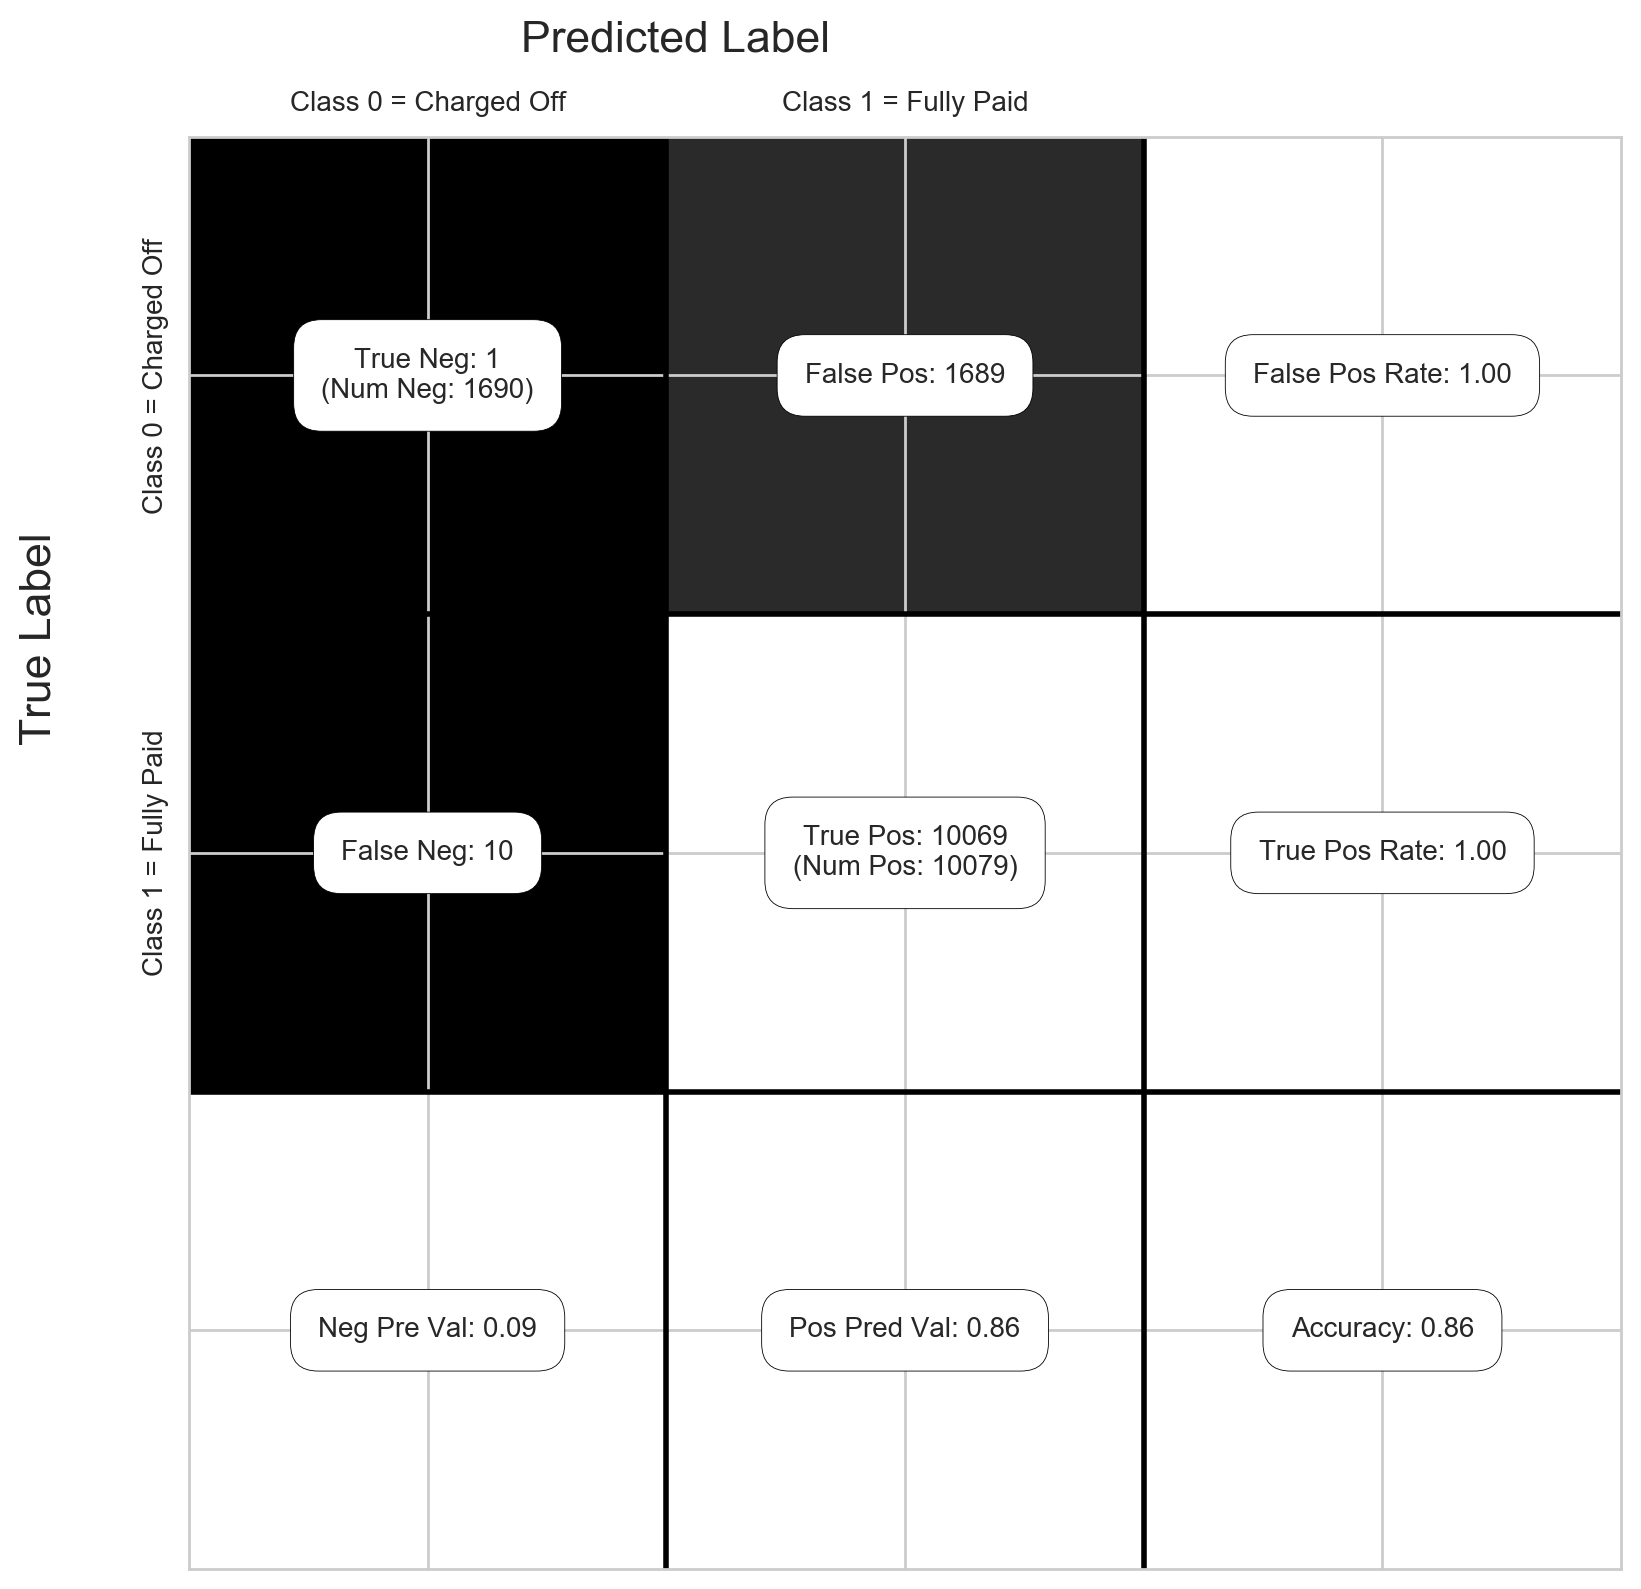

In [85]:
C = confusion_matrix(y_test, gsbdt.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Charged Off', 'Class 1 = Fully Paid'])

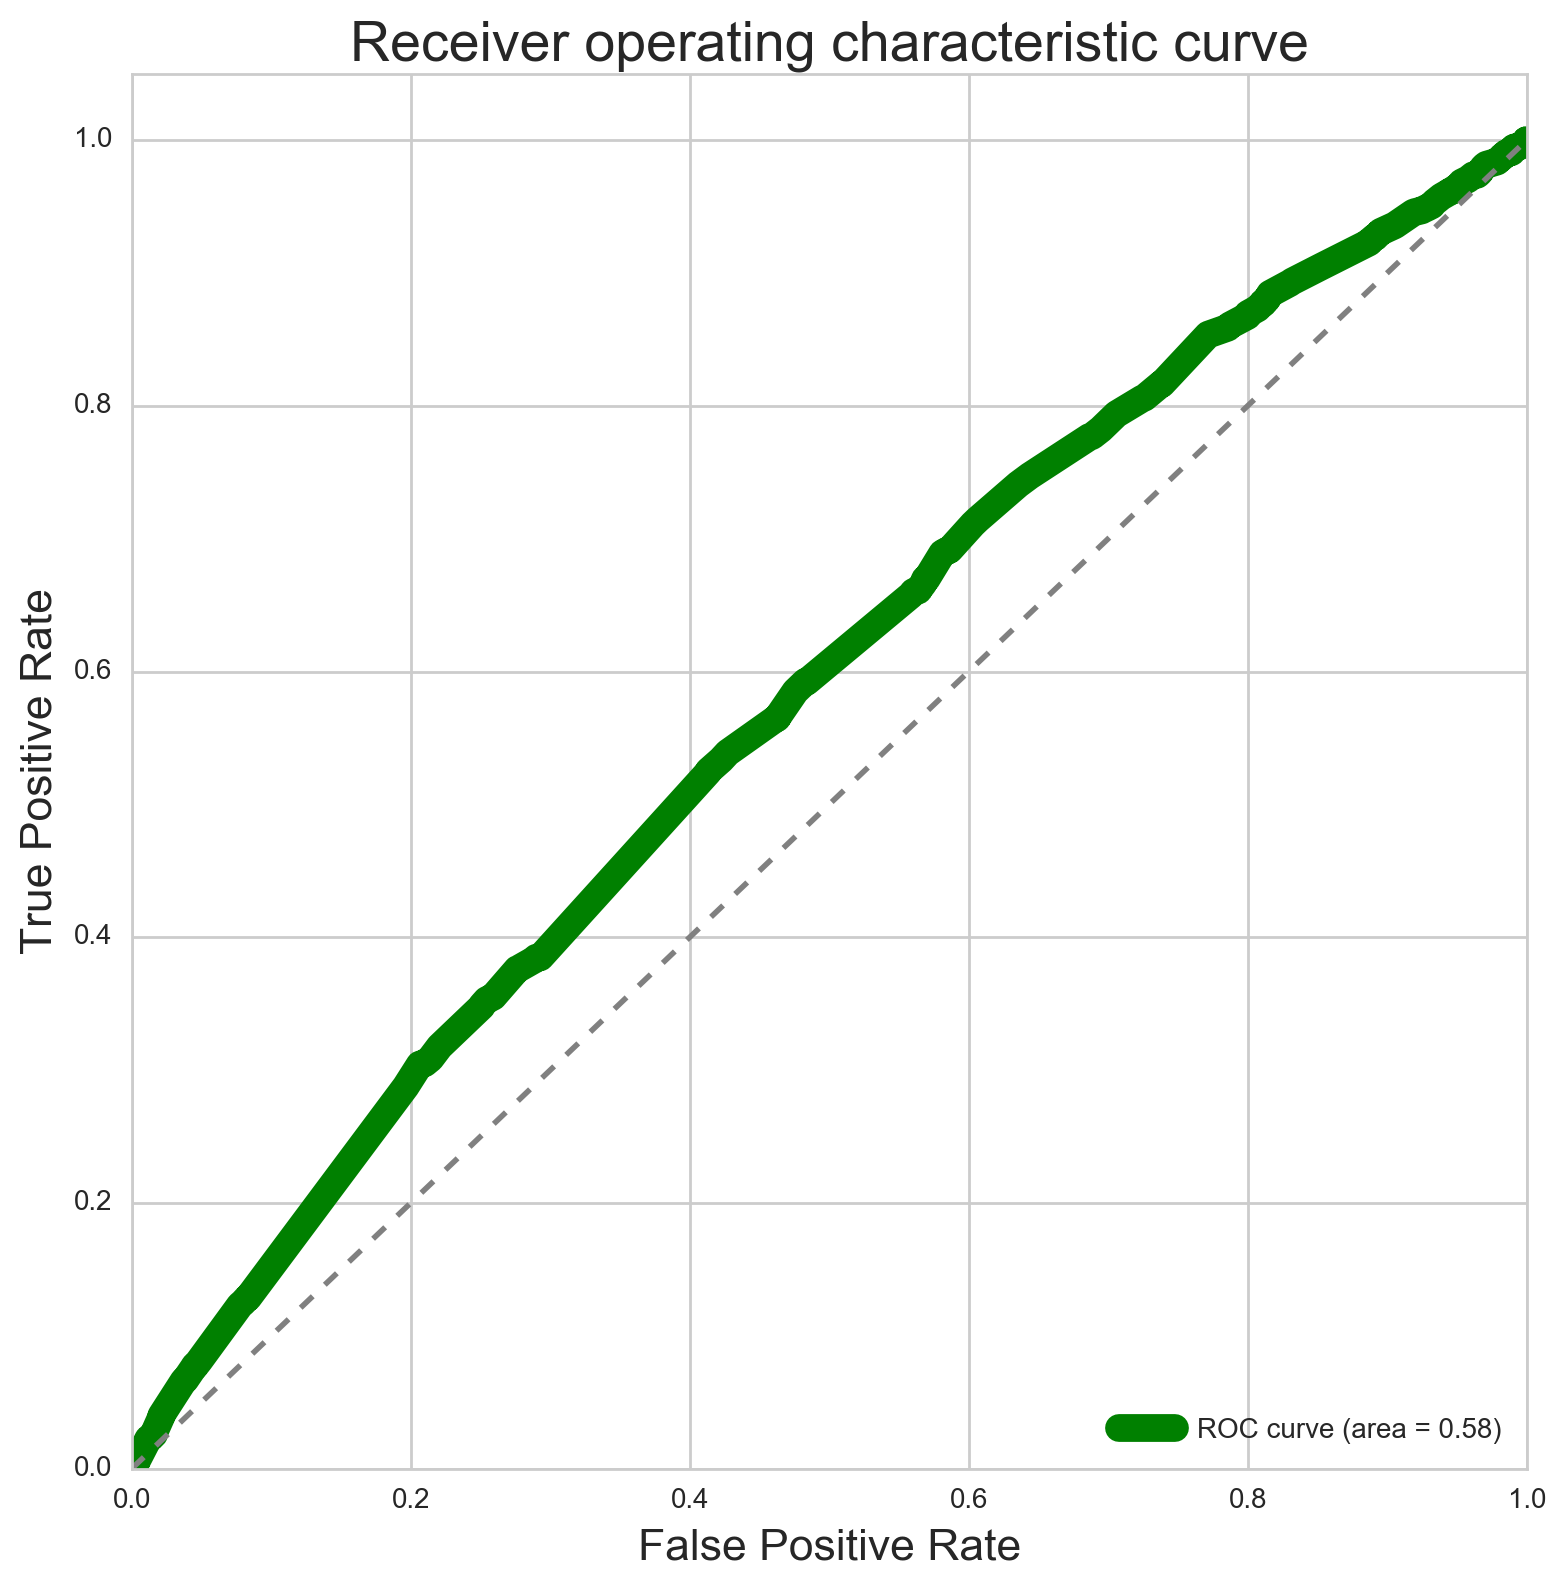

In [86]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = gsbdt.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()